In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import os
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

%config IPCompleter.greedy=True

In [2]:
print(os.getcwd())

/Users/montealvo/Documents/SB_DataScience/Capstone/Mass_Mobilization


In [186]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Table of Contents

   * [Data Loading](#data_load)
   * [Demand Exploration](#demands)
   * [Response Exploration](#responses)
   * [Country Exploration](#country)
   * [Region Exploration](#region)
   * [Duration Exploration](#duration)
   * [Season Exploration](#season)
   * [Participant Category Exploration](#part_category)
   * [Multidemand Exploration](#multidemands)
   * [Multiresponse Exploration](#multiresponse)
   * [Protestor Violence Exploration](#prot_violence)
   * [Exploration](#first_insp)
   * [Categorical plots](#cat_insp)
   * [Correlation matrix](#corr)
   * [Stacked graph for State responses](#stack)
   * [Feature Importance](#random_forest)

## Data loading <a class="anchor" id="data_load"></a>

In [3]:
df = pd.read_csv('../Mass_Mobilization/df.csv')

In [4]:
df.head()

id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand2_y  \
0      15.0         1.0     1990.0  ...  labor wage dispute   
1      25.0         6.0     1990.0  ...                 NaN   
2       1.0         7.0     1990.0  ...                 NaN   
3      12.0         7.0     1990.0  ...                 NaN   
4      14.0         8.0     1990.0  ...                 NaN   

   protesterdemand3_y  protesterdemand4_y  stateresponse1_y stateresponse2_y  \
0                 NaN                 NaN            ignore              NaN   
1                 NaN                 NaN            ignore              NaN   
2                 NaN                 NaN            ignore              NaN   
3                 NaN                 NaN      accomodation              NaN   
4                 NaN                 NaN   crowd dispersal          arrests   

  stateresponse3_y stateresponse4_y stateresponse5_y  stateresponse6_y  \
0              NaN              NaN              NaN               NaN   
1              NaN              NaN              NaN               NaN   
2              NaN              NaN              NaN               NaN   
3              NaN              NaN              NaN               NaN   
4     accomodation              NaN              NaN               NaN   

  stateresponse7_y  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 53 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          14482 non-null  int64  
 1   country                     14482 non-null  object 
 2   ccode                       14482 non-null  int64  
 3   year                        14482 non-null  int64  
 4   region                      14482 non-null  object 
 5   protest                     14482 non-null  int64  
 6   protestnumber               14482 non-null  int64  
 7   startday                    14482 non-null  float64
 8   startmonth                  14482 non-null  float64
 9   startyear                   14482 non-null  float64
 10  endday                      14482 non-null  float64
 11  endmonth                    14482 non-null  float64
 12  endyear                     14482 non-null  float64
 13  protesterviolence           144

In [6]:
df_cat_dict = {
"region" : 'category',
"startmonth" : 'category',
"endmonth" : 'category',
"new_participants_category" : 'category',
"labor_wage_dispute" : 'bool',
"land_farm_issue" : 'bool',
"police_brutality" : 'bool',
"political_behavior" : 'bool',
"price_increases_tax_policy" : 'bool',
"removal_of_politician" : 'bool',
"social_restrictions" : 'bool',
"accomodation" : 'bool',
"arrests" : 'bool',
"beatings" : 'bool',
"crowd_dispersal" : 'bool',
"ignore" : 'bool',
"killings" : 'bool',
"shootings" : 'bool',
"first_response" : 'category',
"last_response" : 'category',
"protesterdemand1_y" : 'category',
"protesterdemand2_y" : 'category',
"protesterdemand3_y" : 'category',
"protesterdemand4_y" : 'category',
"stateresponse1_y" : 'category',
"stateresponse2_y" : 'category',
"stateresponse3_y" : 'category',
"stateresponse4_y" : 'category',
"stateresponse5_y" : 'category',
"stateresponse6_y" : 'category',
"stateresponse7_y" : 'category',
"year" : 'int',
"startday" : 'int',
"startyear" : 'int',
"endday" : 'int',
"endyear" : 'int',
"protesterviolence" : 'int',
"start_date": 'datetime64[ns]',
"end_date": 'datetime64[ns]',
"protesterviolence" :'bool'
}

In [7]:
df = df.astype(df_cat_dict)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          14482 non-null  int64         
 1   country                     14482 non-null  object        
 2   ccode                       14482 non-null  int64         
 3   year                        14482 non-null  int64         
 4   region                      14482 non-null  category      
 5   protest                     14482 non-null  int64         
 6   protestnumber               14482 non-null  int64         
 7   startday                    14482 non-null  int64         
 8   startmonth                  14482 non-null  category      
 9   startyear                   14482 non-null  int64         
 10  endday                      14482 non-null  int64         
 11  endmonth                    14482 non-null  category  

In [9]:
df.nunique()

id                            14482
country                         166
ccode                           168
year                             30
region                            8
protest                           1
protestnumber                   143
startday                         31
startmonth                       12
startyear                        30
endday                           31
endmonth                         12
endyear                          30
protesterviolence                 2
location                       4258
protesteridentity              5529
sources                       13540
notes                         13322
participants_int                304
new_participants_category         7
demand_combo                    135
labor_wage_dispute                2
land_farm_issue                   2
police_brutality                  2
political_behavior                2
price_increases_tax_policy        2
removal_of_politician             2
social_restrictions         

df2 is a dataframe that only contains the features and the target columns

In [10]:
df2 = df[['country','region','year','startmonth','participants_int','new_participants_category', 'labor_wage_dispute','land_farm_issue','police_brutality','political_behavior','price_increases_tax_policy','removal_of_politician','social_restrictions','protesterdemand1_y','protesterdemand2_y','protesterdemand3_y','protesterdemand4_y','stateresponse1_y', 'stateresponse2_y', 'stateresponse3_y','stateresponse4_y','stateresponse5_y','stateresponse6_y','stateresponse7_y','accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings','first_response','last_response','demands_count','responses_count','start_date','end_date', 'protesterviolence']]

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country                     14482 non-null  object        
 1   region                      14482 non-null  category      
 2   year                        14482 non-null  int64         
 3   startmonth                  14482 non-null  category      
 4   participants_int            14465 non-null  float64       
 5   new_participants_category   14465 non-null  category      
 6   labor_wage_dispute          14482 non-null  bool          
 7   land_farm_issue             14482 non-null  bool          
 8   police_brutality            14482 non-null  bool          
 9   political_behavior          14482 non-null  bool          
 10  price_increases_tax_policy  14482 non-null  bool          
 11  removal_of_politician       14482 non-null  bool      

In [12]:
df2.protesterviolence.value_counts()

False    10674
True      3808
Name: protesterviolence, dtype: int64

## Demand Breakdown <a class="anchor" id="demands"></a>

Creating a dataframe that specifies the percentage of each demand in the dataset

In [13]:
dem_total = df.demands_count.sum()
dem_columns = ["labor_wage_dispute","land_farm_issue","police_brutality","political_behavior","price_increases_tax_policy","removal_of_politician","social_restrictions"]
dem_feature = []
dem_pct_col = []

for col in dem_columns:
    dem_feature.append(col)
    dem_pct_col.append(round((df[col].sum()/dem_total)*100,2))
    print (col)
    

labor_wage_dispute
land_farm_issue
police_brutality
political_behavior
price_increases_tax_policy
removal_of_politician
social_restrictions


In [14]:
dem_feat_pct = zip(dem_feature,dem_pct_col)

In [15]:
dem_pct = pd.DataFrame(dem_feat_pct, columns=['dem_feature','dem_pct']).sort_values(by='dem_pct',ascending=False)
dem_pct

dem_feature  dem_pct
3          political_behavior    58.23
0          labor_wage_dispute    12.23
5       removal_of_politician     9.21
4  price_increases_tax_policy     7.83
2            police_brutality     5.70
6         social_restrictions     3.58
1             land_farm_issue     3.22

In [16]:
(df.labor_wage_dispute.sum()/dem_total)*100

12.225400457665904

In [17]:
#["political_behavior","labor_wage_dispute","removal_of_politician","land_farm_issue","police_brutality","price_increases_tax_policy","social_restrictions"]

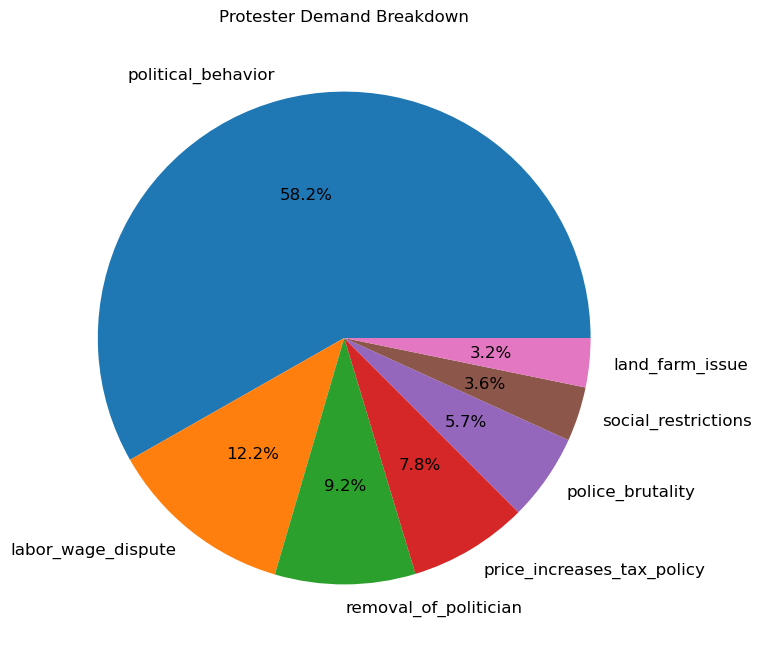

In [195]:
dem_pct.dem_pct.plot(kind='pie', labels= dem_pct['dem_feature'],figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('Protester Demand Breakdown')
plt.ylabel(' ')
plt.style.use('default')
plt.savefig('1_Demand_pct_Breakdown.png')
plt.show()
#put in desc order, sort df

Creating Violence Response Column

In [19]:
df2['Violent_Response']= (df2['killings']+df2['shootings']+df2['beatings'])>0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
<ipython-input-19-0b6bbb135084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Violent_Response']= (df2['killings']+df2['shootings']+df2['beatings'])>0


In [20]:
df2.head(3)

country         region  year startmonth  participants_int  \
0  Canada  North America  1990        1.0            1500.0   
1  Canada  North America  1990        6.0            1000.0   
2  Canada  North America  1990        7.0             500.0   

  new_participants_category  labor_wage_dispute  land_farm_issue  \
0                 1000-1999                True            False   
1                 1000-1999               False            False   
2                   100-999               False            False   

   police_brutality  political_behavior  ...  killings  shootings  \
0             False                True  ...     False      False   
1             False                True  ...     False      False   
2             False                True  ...     False      False   

   first_response last_response demands_count responses_count start_date  \
0          ignore        ignore             2               1 1990-01-15   
1          ignore        ignore             1               1 1990-06-25   
2          ignore        ignore             1               1 1990-07-01   

    end_date protesterviolence Violent_Response  
0 1990-01-15             False            False  
1 1990-06-25             False            False  
2 1990-07-01             False            False  

[3 rows x 39 columns]

Creating graph of mean violent response per demand

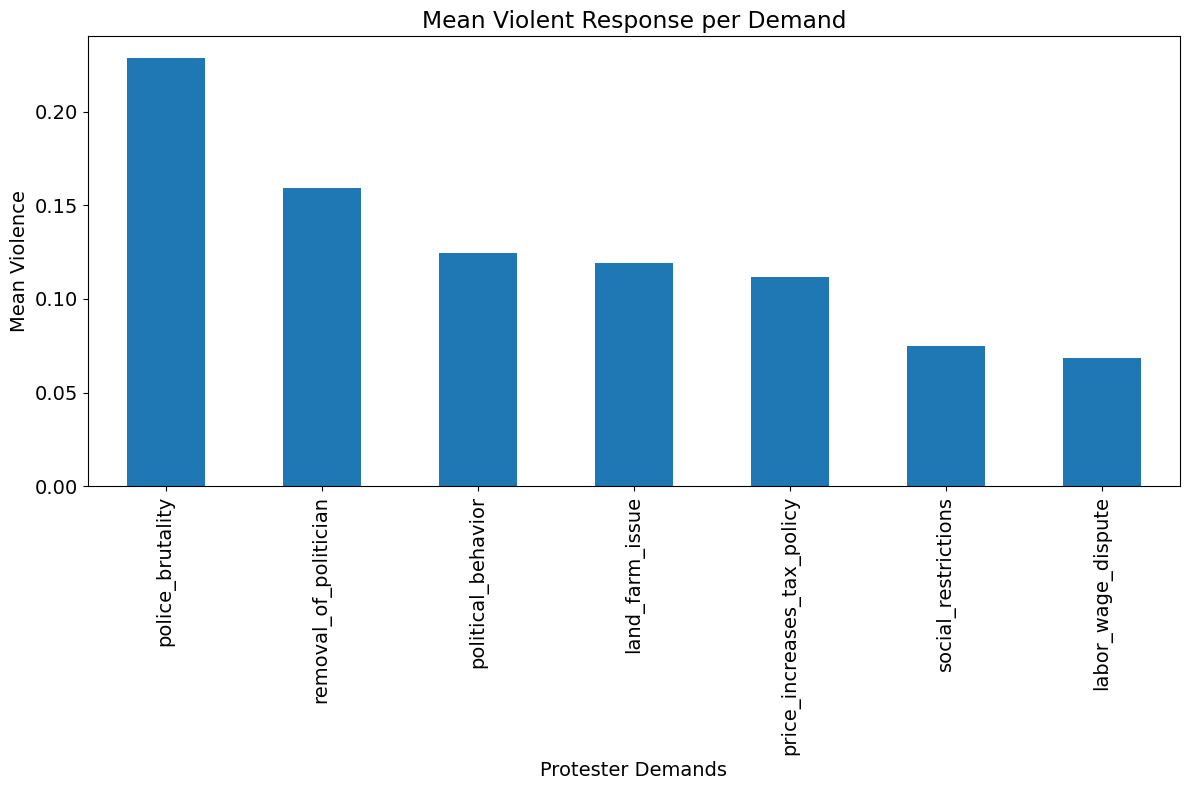

In [369]:
dic = {}
for demand in dem_columns:
    dic[demand] = df2[df2[demand] == 1]['Violent_Response'].mean()
    
#pd.DataFrame([dic]).T.sort_values(by=0, ascending=False).plot(kind='bar')
pd.DataFrame.from_dict(dic, orient = "index", columns = ['Violent_Response']).sort_values(by='Violent_Response', ascending=False).plot(kind='bar')
plt.legend().remove()
plt.title('Mean Violent Response per Demand')
plt.xlabel('Protester Demands')
plt.ylabel('Mean Violence')
plt.style.use('default')
plt.tight_layout()
plt.savefig('2_Avg_Violence_per_Demand.png')

In [258]:
#demand_contingency_table = df2[['Violent_Response'["labor_wage_dispute","land_farm_issue","police_brutality","political_behavior","price_increases_tax_policy","removal_of_politician","social_restrictions"]]]

police_brut_contingency_table = pd.crosstab(df2["police_brutality"],
                            df2['Violent_Response'], 
                               margins = False)
police_brut_contingency_table

Violent_Response  False  True 
police_brutality              
False             11918   1567
True                769    228

In [263]:
#Below we perform a chi-squared test to verify whether the observed difference in each demand is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(police_brut_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=107.141
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [260]:
removal_contingency_table = pd.crosstab(df2["removal_of_politician"],
                            df2['Violent_Response'], 
                               margins = False)
removal_contingency_table

Violent_Response       False  True 
removal_of_politician              
False                  11333   1539
True                    1354    256

In [264]:
#Below we perform a chi-squared test to verify whether the observed difference in each demand is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(removal_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=20.143
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [270]:
pol_behavior_contingency_table = pd.crosstab(df2["political_behavior"],
                            df2['Violent_Response'], 
                               margins = False)
pol_behavior_contingency_table

Violent_Response    False  True 
political_behavior              
False                3777    526
True                 8910   1269

In [271]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(pol_behavior_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=0.143
Independent (fail to reject H0)
significance=0.050, p=0.706
Independent (fail to reject H0)


In [272]:
land_contingency_table = pd.crosstab(df2["land_farm_issue"],
                            df2['Violent_Response'], 
                               margins = False)
land_contingency_table

Violent_Response  False  True 
land_farm_issue               
False             12192   1728
True                495     67

In [273]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(land_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=0.079
Independent (fail to reject H0)
significance=0.050, p=0.778
Independent (fail to reject H0)


In [274]:
tax_contingency_table = pd.crosstab(df2["price_increases_tax_policy"],
                            df2['Violent_Response'], 
                               margins = False)
tax_contingency_table

Violent_Response            False  True 
price_increases_tax_policy              
False                       11471   1642
True                         1216    153

In [275]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(tax_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=1.946
Independent (fail to reject H0)
significance=0.050, p=0.163
Independent (fail to reject H0)


In [276]:
social_contingency_table = pd.crosstab(df2["social_restrictions"],
                            df2['Violent_Response'], 
                               margins = False)
social_contingency_table


Violent_Response     False  True 
social_restrictions              
False                12108   1748
True                   579     47

In [277]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(social_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=13.923
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [278]:
wage_contingency_table = pd.crosstab(df2["labor_wage_dispute"],
                            df2['Violent_Response'], 
                               margins = False)
wage_contingency_table

Violent_Response    False  True 
labor_wage_dispute              
False               10696   1649
True                 1991    146

In [279]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(wage_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=70.841
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## Country Breakdown <a class="anchor" id="country"></a>

In [22]:
#Violent response by country without filtering by count - head
df2[['country', 'Violent_Response']].groupby('country').agg(['mean','count']).sort_values(by=[('Violent_Response','mean')], ascending= False).head(10)

Violent_Response      
                                  mean count
country                                     
South Sudan                   1.000000     1
Djibouti                      0.700000    10
Guinea                        0.539326    89
Serbia and Montenegro         0.500000     2
Bhutan                        0.500000     2
Ethiopia                      0.486486    37
Uganda                        0.482759    58
Chad                          0.411765    17
Panama                        0.408163    49
Sudan                         0.403846    52

In [23]:
#Violent response by country without filtering by count - tail
df2[['country', 'Violent_Response']].groupby('country').agg(['mean','count']).sort_values(by=[('Violent_Response','mean')], ascending= False).tail(10)

Violent_Response      
                        mean count
country                           
Ireland                  0.0   428
Japan                    0.0    57
Switzerland              0.0     5
Sweden                   0.0    16
Suriname                 0.0    51
Cape Verde               0.0     2
Qatar                    0.0     1
Cyprus                   0.0   125
Singapore                0.0    14
Kosovo                   0.0    19

In [24]:
#Converting violence mean/count by country into data frame
country_violence = pd.DataFrame(df2[['country', 'Violent_Response']].groupby('country').agg(['mean','count']))

In [25]:
country_violence.columns

MultiIndex([('Violent_Response',  'mean'),
            ('Violent_Response', 'count')],
           )

In [26]:
#creating mask for countries with a count of more than 20
ok_country = country_violence[("Violent_Response", "count")] > 20

In [27]:
ok_country.head()

country
Afghanistan    True
Albania        True
Algeria        True
Angola         True
Argentina      True
Name: (Violent_Response, count), dtype: bool

In [28]:
#Violence response with >20 filter - head
country_violence[ok_country].sort_values(by=[('Violent_Response','mean')], ascending= False).head(10)

Violent_Response      
                                     mean count
country                                        
Guinea                           0.539326    89
Ethiopia                         0.486486    37
Uganda                           0.482759    58
Panama                           0.408163    49
Sudan                            0.403846    52
Congo Kinshasa                   0.397260    73
Yemen                            0.375796   157
Egypt                            0.360656   122
Central African Republic         0.360656    61
Iran                             0.339130   115

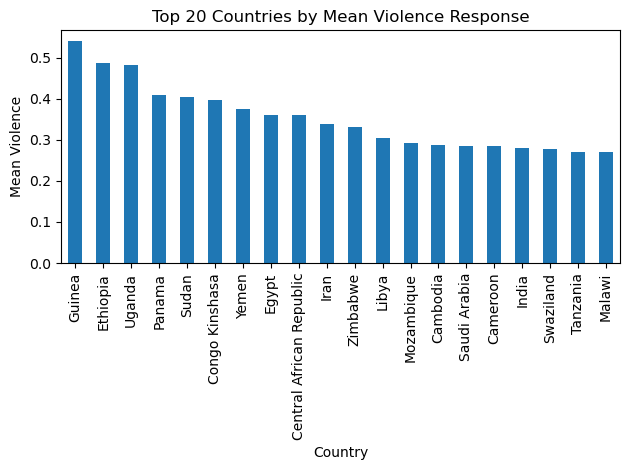

In [197]:
country_violence[ok_country][('Violent_Response','mean')].sort_values(ascending= False).nlargest(n=20).plot(kind='bar')
plt.title('Top 20 Countries by Mean Violence Response')
plt.xlabel('Country')
plt.ylabel('Mean Violence')
plt.style.use('default')
plt.tight_layout()
plt.savefig('3_Avg_Violence_per_Country.png')

In [30]:
#Violence response with >20 filter - tail
country_violence[ok_country].sort_values(by=[('Violent_Response','mean')], ascending= False).tail(10)

Violent_Response      
                           mean count
country                              
Belgium                     0.0    41
Uruguay                     0.0    68
Lithuania                   0.0    35
Cyprus                      0.0   125
France                      0.0   526
Ireland                     0.0   428
Mongolia                    0.0    49
Estonia                     0.0    48
Slovenia                    0.0    21
Czech Republic              0.0    23

In [281]:
country_contingency_table = pd.crosstab(df2['country'],
                            df2['Violent_Response'], 
                               margins = False)
country_contingency_table

Violent_Response  False  True 
country                       
Afghanistan          33      5
Albania              52     15
Algeria              48     10
Angola               17      6
Argentina           106      5
...                 ...    ...
Vietnam              17      2
Yemen                98     59
Yugoslavia          110     27
Zambia               80     14
Zimbabwe             73     36

[166 rows x 2 columns]

In [282]:
#Below we perform a chi-squared test to verify whether the violence observed in each country is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(country_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=195.973, stat=1766.136
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## Region Breakdown <a class="anchor" id="region"></a>

In [31]:
region_violence = pd.DataFrame(df2[['region', 'Violent_Response']].groupby('region').agg(['mean','count']))

In [32]:
region_violence.columns

MultiIndex([('Violent_Response',  'mean'),
            ('Violent_Response', 'count')],
           )

In [33]:
region_violence.index

CategoricalIndex(['Africa', 'Asia', 'Central America', 'Europe', 'MENA',
                  'North America', 'Oceania', 'South America'],
                 categories=['Africa', 'Asia', 'Central America', 'Europe', 'MENA', 'North America', 'Oceania', 'South America'], ordered=False, name='region', dtype='category')

In [34]:
#Violent response by region 
region_violence.sort_values(by=[('Violent_Response','mean')], ascending= False)

Violent_Response      
                            mean count
region                                
MENA                    0.247027  1093
Africa                  0.205795  3037
Asia                    0.153510  2977
Central America         0.149770   434
North America           0.110000   500
South America           0.080251  1595
Oceania                 0.078947    38
Europe                  0.039933  4808

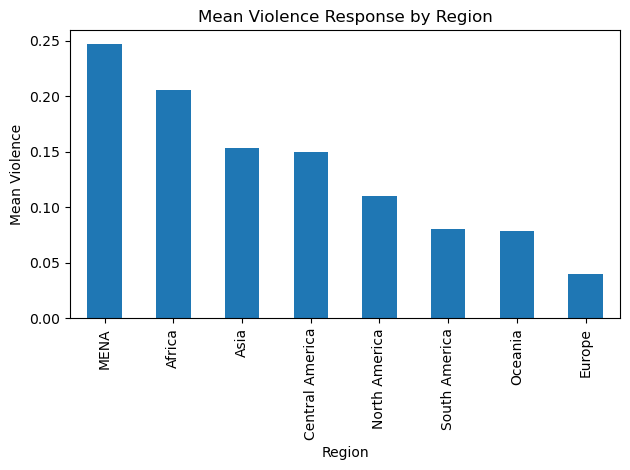

In [227]:
region_violence[('Violent_Response','mean')].sort_values(ascending= False).plot(kind='bar')
plt.title('Mean Violence Response by Region')
plt.xlabel('Region')
plt.ylabel('Mean Violence')
plt.style.use('default')
plt.tight_layout()
plt.savefig('4_Avg_Violence_per_region.png')

In [283]:
region_contingency_table = pd.crosstab(df2['region'],
                            df2['Violent_Response'], 
                               margins = False)
region_contingency_table

Violent_Response  False  True 
region                        
Africa             2412    625
Asia               2520    457
Central America     369     65
Europe             4616    192
MENA                823    270
North America       445     55
Oceania              35      3
South America      1467    128

In [284]:
#Below we perform a chi-squared test to verify whether the observed violence in each region is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(region_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=14.067, stat=708.665
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


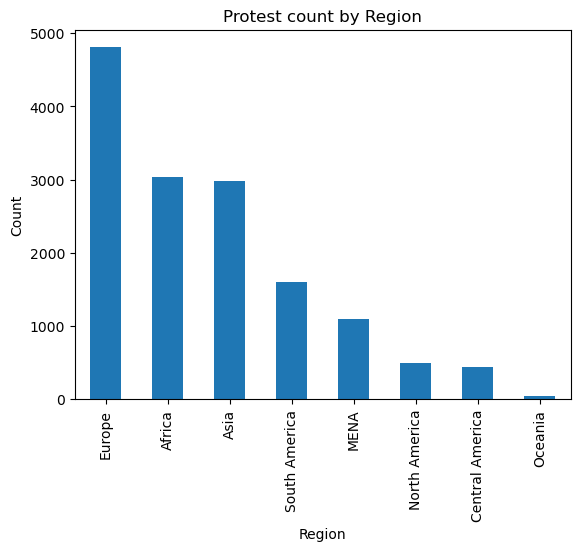

In [36]:
region_violence[('Violent_Response','count')].sort_values(ascending= False).plot(kind='bar')
plt.title('Protest count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.style.use('default')
plt.savefig('count_per_region.png')

In [199]:
#region_violence.plot(y=[('Violent_Response','count'),('Violent_Response','mean')], kind="bar")


## Responses Breakdown  <a class="anchor" id="demands"></a>

In [38]:
resp_total = df.responses_count.sum()
resp_total

18301

In [39]:
resp_total = df.demands_count.sum()
resp_columns = ["accomodation","arrests","beatings","crowd_dispersal","ignore","killings","shootings"]
resp_feature = []
resp_pct_col = []

for col in resp_columns:
    resp_feature.append(col)
    resp_pct_col.append(round((df[col].sum()/resp_total)*100,2))
    print (col)

accomodation
arrests
beatings
crowd_dispersal
ignore
killings
shootings


In [40]:
resp_pct_col

[8.54, 11.54, 4.42, 25.22, 45.62, 4.39, 4.97]

In [41]:
resp_feat_pct = zip(resp_feature,resp_pct_col)

In [42]:
resp_pct = pd.DataFrame(resp_feat_pct, columns=['resp_feature','resp_pct']).sort_values(by='resp_pct',ascending=False)
resp_pct

resp_feature  resp_pct
4           ignore     45.62
3  crowd_dispersal     25.22
1          arrests     11.54
0     accomodation      8.54
6        shootings      4.97
2         beatings      4.42
5         killings      4.39

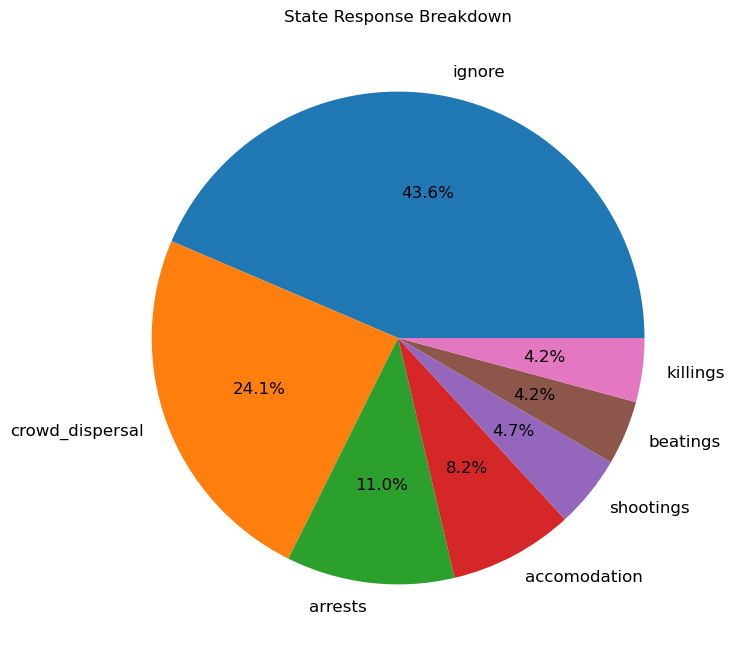

In [200]:
resp_pct.resp_pct.plot(kind='pie', labels= resp_pct['resp_feature'] ,figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('State Response Breakdown')
plt.ylabel(' ')
plt.style.use('default')
plt.savefig('5_Response_pct_Breakdown.png')
plt.show()

#### Exploration <a class="anchor" id="first_insp"></a>

## Protest count by country (Top 20)

In [44]:
df.groupby("country").protest.count().nlargest(n=20)

country
United Kingdom    547
France            526
Ireland           428
Germany           360
Kenya             348
South Korea       340
Bangladesh        336
Venezuela         314
Greece            308
China             263
Thailand          246
Namibia           225
Brazil            220
Romania           215
Nepal             206
India             203
Russia            192
Pakistan          172
South Africa      171
Italy             163
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

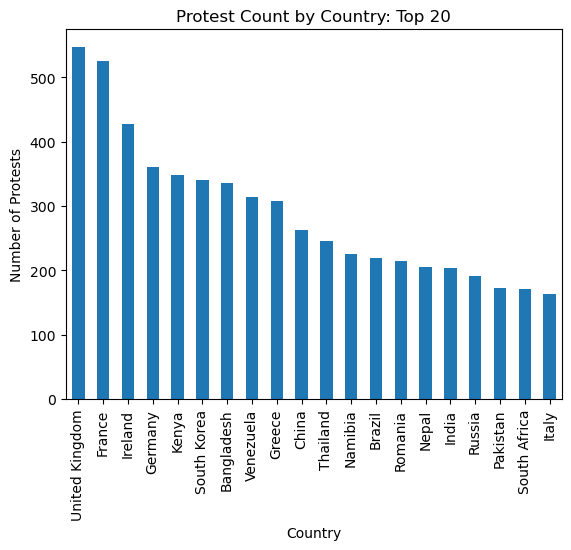

In [45]:
protest_count = df.groupby("country").protest.count().nlargest(n=20).plot(kind='bar', title='Protest Count by Country: Top 20')
protest_count.set_xlabel("Country")
protest_count.set_ylabel("Number of Protests")

## Protest by Region

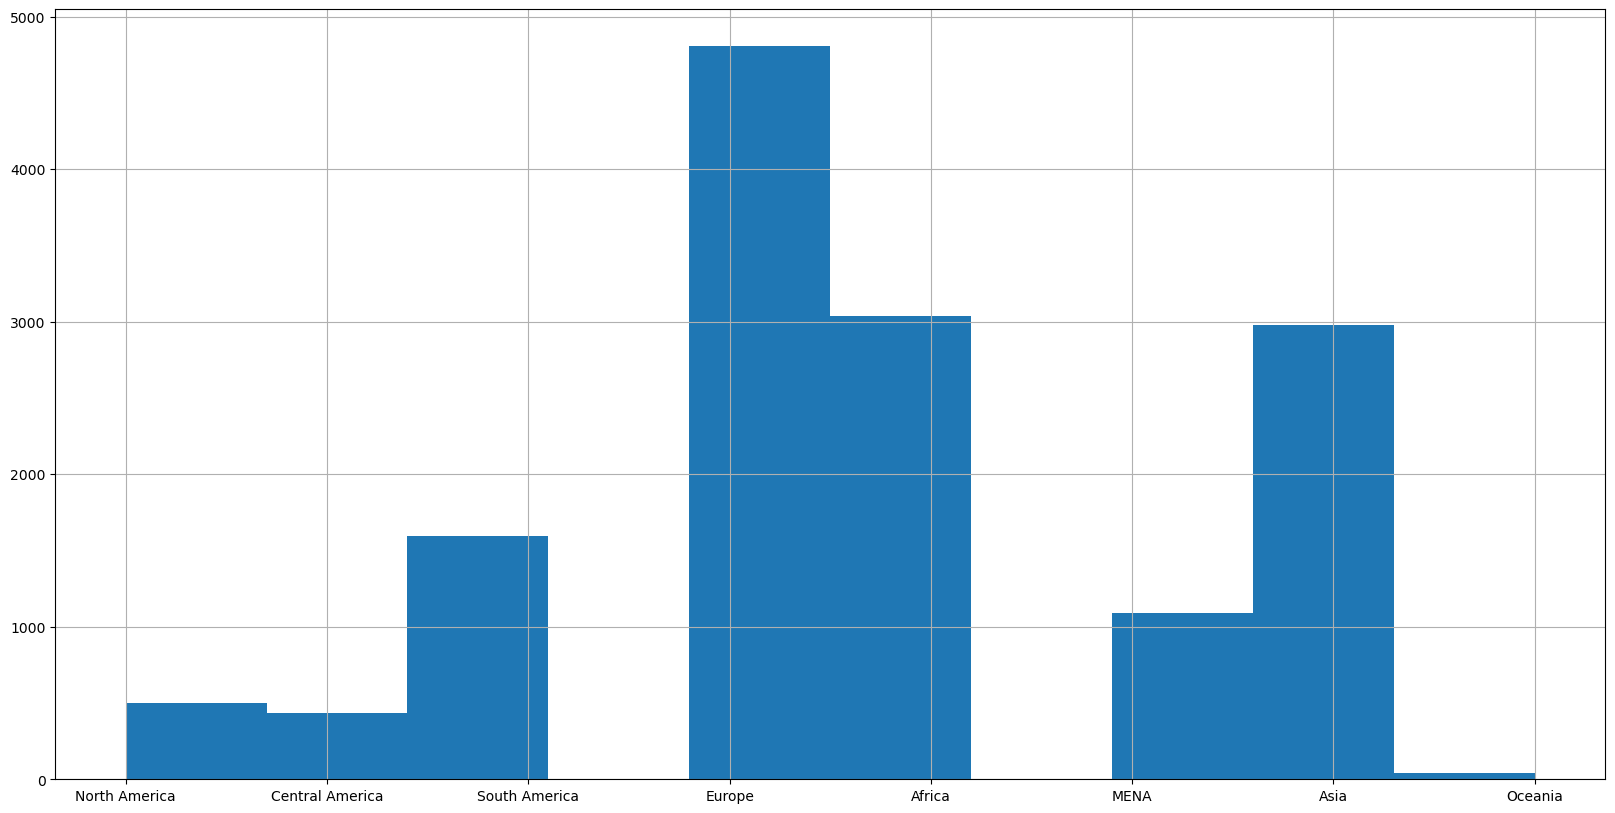

In [46]:
prot_region = df.region.hist(figsize = (20,10))
#prot_region.title('Number of Protests by Region')

## Protest Count by Year

In [47]:
df.groupby("year").protest.count()

year
1990    569
1991    371
1992    409
1993    328
1994    389
1995    353
1996    408
1997    487
1998    442
1999    410
2000    487
2001    392
2002    415
2003    386
2004    438
2005    497
2006    454
2007    444
2008    396
2009    376
2010    452
2011    684
2012    551
2013    584
2014    769
2015    857
2016    713
2017    540
2018    698
2019    183
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

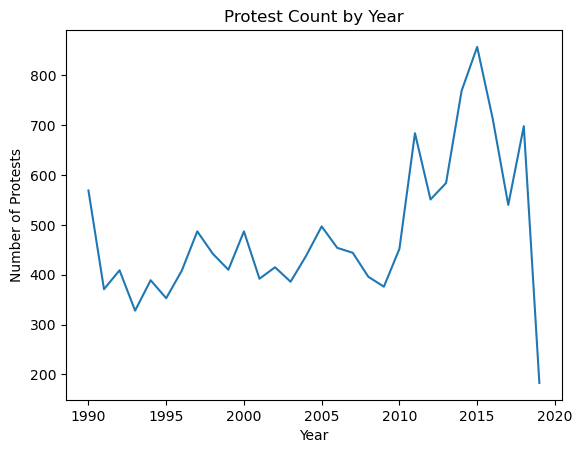

In [48]:
protest_by_year = df.groupby("year").protest.count().plot(kind='line',  title='Protest Count by Year')
protest_by_year.set_xlabel("Year")
protest_by_year.set_ylabel("Number of Protests")

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

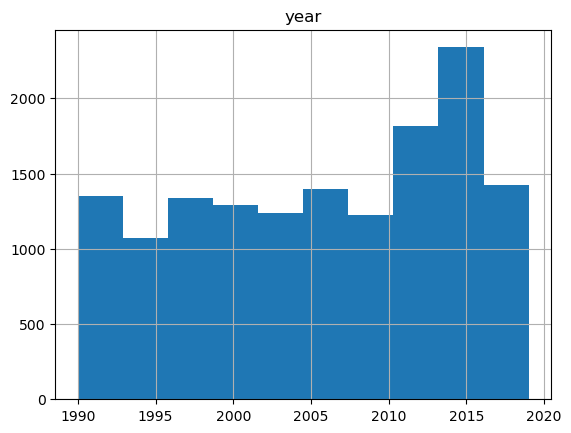

In [49]:
df.hist(column='year')

In [201]:
year_violence = pd.DataFrame(df2[['year', 'Violent_Response']].groupby('year').agg(['mean','count']))

In [410]:
year_violence

Violent_Response      
                 mean count
year                       
1990         0.219684   569
1991         0.199461   371
1992         0.173594   409
1993         0.176829   328
1994         0.146530   389
1995         0.164306   353
1996         0.122549   408
1997         0.133470   487
1998         0.133484   442
1999         0.129268   410
2000         0.098563   487
2001         0.122449   392
2002         0.081928   415
2003         0.090674   386
2004         0.114155   438
2005         0.134809   497
2006         0.107930   454
2007         0.108108   444
2008         0.116162   396
2009         0.119681   376
2010         0.106195   452
2011         0.192982   684
2012         0.141561   551
2013         0.109589   584
2014         0.091027   769
2015         0.091015   857
2016         0.092567   713
2017         0.087037   540
2018         0.081662   698
2019         0.081967   183

In [202]:
#Violent response by region 
year_violence.sort_values(by=[('Violent_Response','mean')], ascending= False)

Violent_Response      
                 mean count
year                       
1990         0.219684   569
1991         0.199461   371
2011         0.192982   684
1993         0.176829   328
1992         0.173594   409
1995         0.164306   353
1994         0.146530   389
2012         0.141561   551
2005         0.134809   497
1998         0.133484   442
1997         0.133470   487
1999         0.129268   410
1996         0.122549   408
2001         0.122449   392
2009         0.119681   376
2008         0.116162   396
2004         0.114155   438
2013         0.109589   584
2007         0.108108   444
2006         0.107930   454
2010         0.106195   452
2000         0.098563   487
2016         0.092567   713
2014         0.091027   769
2015         0.091015   857
2003         0.090674   386
2017         0.087037   540
2019         0.081967   183
2002         0.081928   415
2018         0.081662   698

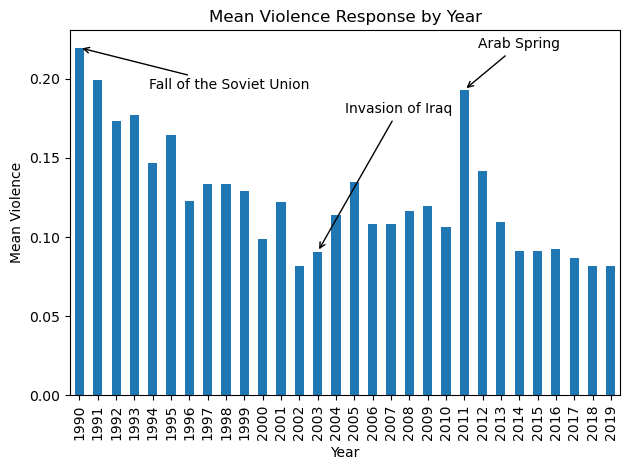

In [432]:
year_violence[('Violent_Response','mean')].plot(kind='bar')
plt.title('Mean Violence Response by Year')
plt.xlabel('Year')
plt.ylabel('Mean Violence')

plt.annotate("Fall of the Soviet Union", xy=(0, 0.219684),
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0"))
plt.annotate("Arab Spring", xy=(21, 0.192982),
            xytext=(10, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0."))
plt.annotate("Invasion of Iraq", xy=(13, 0.090674),
            xytext=(20, 100), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.style.use('default')
plt.tight_layout()
plt.savefig('6_Avg_Violence_per_year.png')

In [285]:
year_contingency_table = pd.crosstab(df2['year'],
                            df2['Violent_Response'], 
                               margins = False)
year_contingency_table

Violent_Response  False  True 
year                          
1990                444    125
1991                297     74
1992                338     71
1993                270     58
1994                332     57
1995                295     58
1996                358     50
1997                422     65
1998                383     59
1999                357     53
2000                439     48
2001                344     48
2002                381     34
2003                351     35
2004                388     50
2005                430     67
2006                405     49
2007                396     48
2008                350     46
2009                331     45
2010                404     48
2011                552    132
2012                473     78
2013                520     64
2014                699     70
2015                779     78
2016                647     66
2017                493     47
2018                641     57
2019                168     15

In [287]:
#Below we perform a chi-squared test to verify whether the observed violence each year is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(year_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=42.557, stat=188.104
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## Seasonal Distribution <a class="anchor" id="season"></a>

In [50]:
df2.country.value_counts()

United Kingdom    547
France            526
Ireland           428
Germany           360
Kenya             348
                 ... 
Cape Verde          2
Germany West        2
Bhutan              2
South Sudan         1
Qatar               1
Name: country, Length: 166, dtype: int64

#Country hemisphere, where cut off was country mostly in souther hemisphere

In [51]:
southern_hem_countries = ['Australia', 'Papua New Guinea', 'Argentina', 'Bolivia', 'Chile', 'Paraguay', 'Peru', 'Uruguay', 'Brazil', 'Ecuador','Angola', 'Botswana','Burundi','Comoros','Eswatini','Lesotho','Madagascar','Malawi','Mauritius','Mayotte','Mozambique','Namibia','Reunion','Rwanda','Seychelles','South Africa','Tanzania','Zambia','Zimbabwe','The Democratic Republic of the Congo','Gabon','East Timor','Indonesia']

In [52]:
df2['hemisphere'] = ['southern' if country in southern_hem_countries else 'northern' for country in df2['country']]

<ipython-input-52-da6a9956ce42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hemisphere'] = ['southern' if country in southern_hem_countries else 'northern' for country in df2['country']]


In [53]:
df2['hemisphere'].head()

0    northern
1    northern
2    northern
3    northern
4    northern
Name: hemisphere, dtype: object

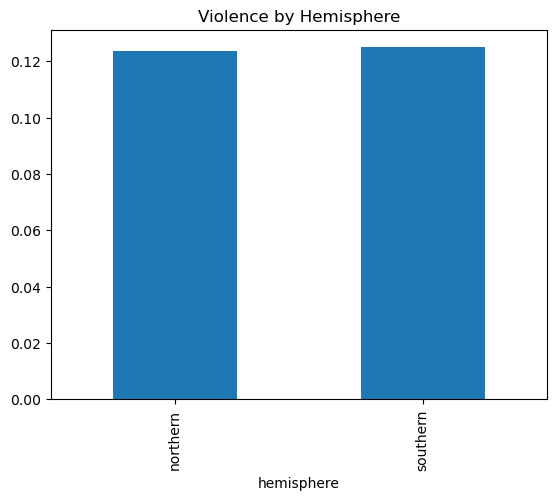

In [54]:
hem_viol = df2[['hemisphere','Violent_Response']].groupby("hemisphere").mean().plot(kind='bar', title='Violence by Hemisphere')
hem_viol.legend().remove()

In [288]:
hemi_contingency_table = pd.crosstab(df2['hemisphere'],
                            df2['Violent_Response'], 
                               margins = False)
hemi_contingency_table

Violent_Response  False  True 
hemisphere                    
northern          10551   1490
southern           2136    305

In [289]:
#Below we perform a chi-squared test to verify whether the observed violence in each hemisphere is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(hemi_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=0.017
Independent (fail to reject H0)
significance=0.050, p=0.896
Independent (fail to reject H0)


In [55]:
df2[['hemisphere','Violent_Response']].groupby("hemisphere").agg(['mean','count'])

Violent_Response       
                       mean  count
hemisphere                        
northern           0.123744  12041
southern           0.124949   2441

In [56]:
#df2['startmonth'] in (12,1,1)
df2['startmonth'].isin([12,1,2]).head()

0     True
1    False
2    False
3    False
4    False
Name: startmonth, dtype: bool

In [57]:
# creating list of season conditions
conditions_sea = [
    ((df2['hemisphere'] == 'northern') & (df2['startmonth'].isin([12,1,2]))),
    ((df2['hemisphere'] == 'northern') & (df2['startmonth'].isin([3,4,5]))),
    ((df2['hemisphere'] == 'northern') & (df2['startmonth'].isin([6,7,8]))),
    ((df2['hemisphere'] == 'northern') & (df2['startmonth'].isin([9,10,11]))),
    ((df2['hemisphere'] == 'southern') & (df2['startmonth'].isin([6,7,8]))),
    ((df2['hemisphere'] == 'southern') & (df2['startmonth'].isin([9,10,11]))),
    ((df2['hemisphere'] == 'southern') & (df2['startmonth'].isin([12,1,2]))),
    ((df2['hemisphere'] == 'southern') & (df2['startmonth'].isin([3,4,5])))
    ]

# creating list of the values to assign to each condition
values_sea = ['winter', 'spring', 'summer', 'autumn','winter','spring','summer','autumn']

# creating a new column using np.select to assign values using condition list as argument
df2['season'] = np.select(conditions_sea, values_sea)



<ipython-input-57-625059630585>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['season'] = np.select(conditions_sea, values_sea)


In [58]:
df2['season'].head()

0    winter
1    summer
2    summer
3    summer
4    summer
Name: season, dtype: object

In [306]:
df2[['season','Violent_Response']].groupby("season").agg(['mean','count']).sort_index()#sort_values(by=[('Violent_Response','mean')], ascending= False)

Violent_Response      
                   mean count
season                       
autumn         0.105949  3681
spring         0.124844  3997
summer         0.134126  3027
winter         0.132380  3777

In [307]:
seasons_ = ['spring', 'summer', 'autumn','winter']
mapping = {season: i for i, season in enumerate(seasons_)}
key = df2['season'].map(mapping)

In [313]:
sorted_season = df2.iloc[key.argsort()]


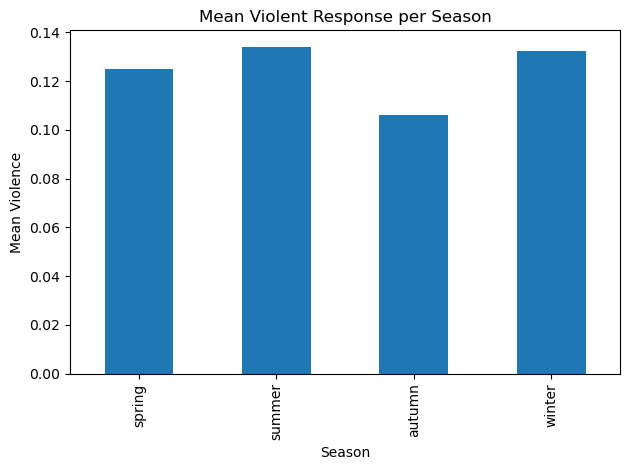

In [321]:
viol_season = sorted_season[['season','Violent_Response']].groupby(key).mean().plot(kind='bar',title='Mean Violent Response per Season', xlabel='Season', ylabel='Mean Violence')
x_labels = seasons_
viol_season.set_xticklabels(x_labels)
viol_season.legend().remove()
plt.style.use('default')
plt.tight_layout()
plt.savefig('7a_Violence_Across_Seasons.png')

In [320]:
season_contingency_table = pd.crosstab(df2['season'],
                            df2['Violent_Response'], 
                               margins = False)
season_contingency_table

Violent_Response  False  True 
season                        
autumn             3291    390
spring             3498    499
summer             2621    406
winter             3277    500

In [291]:
#Below we perform a chi-squared test to verify whether the observed violence each season is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(season_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=7.815, stat=16.372
Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)


In [61]:
df2[df2['startmonth'].isin([12,1,2])].head()

country         region  year startmonth  participants_int  \
0   Canada  North America  1990        1.0            1500.0   
13  Canada  North America  1995        2.0            3000.0   
18  Canada  North America  2000        2.0            2000.0   
19  Canada  North America  2000        2.0             400.0   
25  Canada  North America  2006        2.0             200.0   

   new_participants_category  labor_wage_dispute  land_farm_issue  \
0                  1000-1999                True            False   
13                 2000-4999               False            False   
18                 2000-4999               False            False   
19                   100-999               False            False   
25                   100-999               False            False   

    police_brutality  political_behavior  ...   first_response  \
0              False                True  ...           ignore   
13             False               False  ...           ignore   
18             False                True  ...           ignore   
19              True               False  ...     accomodation   
25              True                True  ...  crowd dispersal   

      last_response  demands_count responses_count start_date   end_date  \
0            ignore              2               1 1990-01-15 1990-01-15   
13           ignore              1               1 1995-02-20 1995-02-20   
18           ignore              1               1 2000-02-22 2000-02-23   
19     accomodation              1               1 2000-02-26 2000-02-26   
25  crowd dispersal              2               1 2006-02-21 2006-08-17   

   protesterviolence Violent_Response hemisphere  season  
0              False            False   northern  winter  
13             False            False   northern  winter  
18              True            False   northern  winter  
19             False            False   northern  winter  
25              True            False   northern  winter  

[5 rows x 41 columns]

In [62]:
df.groupby("startmonth").protest.count()

startmonth
1.0     1311
2.0     1341
3.0     1530
4.0     1265
5.0     1458
6.0     1089
7.0     1087
8.0      982
9.0     1096
10.0    1140
11.0    1189
12.0     994
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

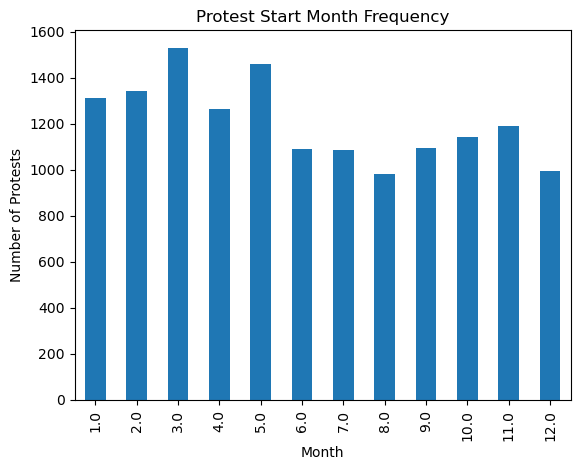

In [63]:
start_month = df.groupby("startmonth").protest.count().plot(kind='bar', title='Protest Start Month Frequency')
start_month.set_xlabel("Month")
start_month.set_ylabel("Number of Protests")
#ylabels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

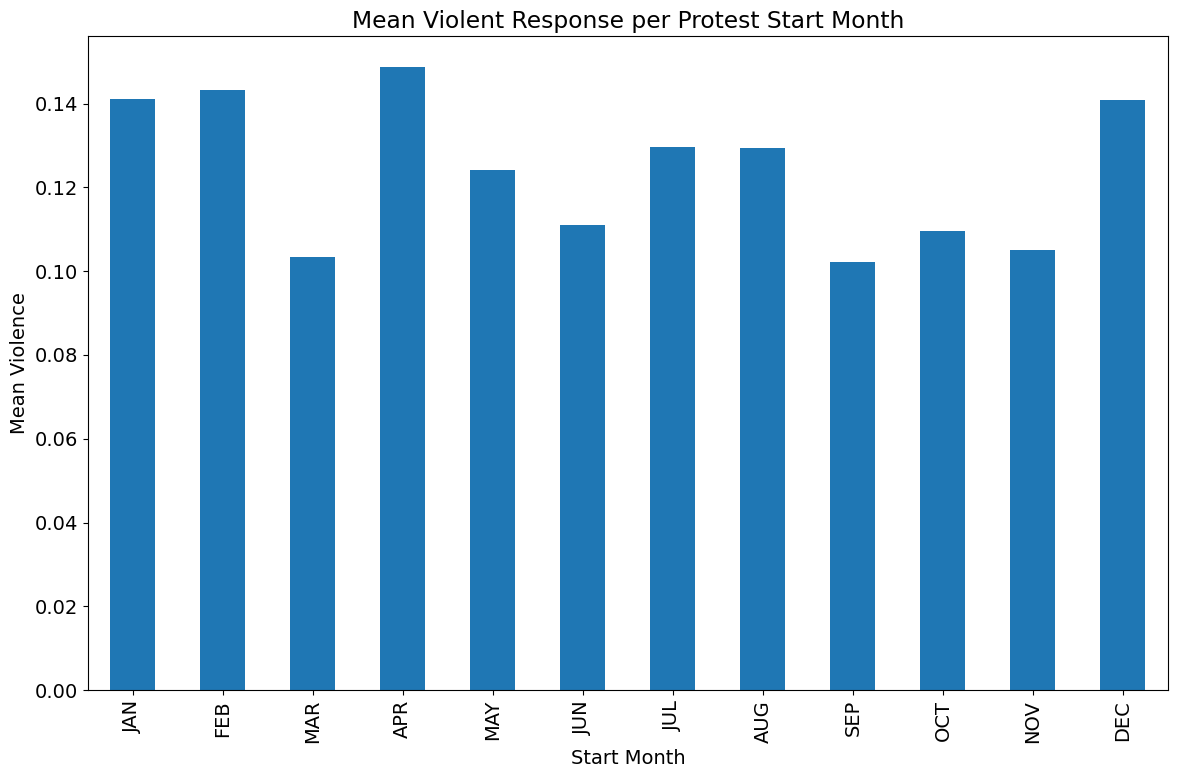

In [241]:
viol_mon = df2[['startmonth','Violent_Response']].groupby("startmonth").mean().plot(kind='bar',title='Mean Violent Response per Protest Start Month', xlabel='Start Month', ylabel='Mean Violence')
viol_mon.legend().remove()
x_labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
viol_mon.set_xticklabels(x_labels)
plt.tight_layout()
plt.style.use('default')
plt.savefig('8_Violence_Across_Startmonth.png')

In [292]:
start_contingency_table = pd.crosstab(df2['startmonth'],
                            df2['Violent_Response'], 
                               margins = False)
start_contingency_table

Violent_Response  False  True 
startmonth                    
1.0                1126    185
2.0                1149    192
3.0                1372    158
4.0                1077    188
5.0                1277    181
6.0                 968    121
7.0                 946    141
8.0                 855    127
9.0                 984    112
10.0               1015    125
11.0               1064    125
12.0                854    140

In [293]:
#Below we perform a chi-squared test to verify whether the observed violence each start month is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(start_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=19.675, stat=36.903
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## Protest duration <a class="anchor" id="duration"></a>

In [65]:
duration = df2.end_date - df2.start_date

In [66]:
df2.start_date

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-07-12
4       1990-08-14
           ...    
14477   2014-02-16
14478   2016-05-15
14479   2017-06-15
14480   2017-07-15
14481   2017-10-31
Name: start_date, Length: 14482, dtype: datetime64[ns]

In [67]:
df2.end_date

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-09-06
4       1990-08-15
           ...    
14477   2014-02-18
14478   2016-06-09
14479   2017-06-15
14480   2017-07-15
14481   2017-10-31
Name: end_date, Length: 14482, dtype: datetime64[ns]

In [68]:
df2['dur_column'] = duration.dt.days + 1

<ipython-input-68-00ea67ea6616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dur_column'] = duration.dt.days + 1


In [69]:
df2.dur_column

0         1
1         1
2         1
3        57
4         2
         ..
14477     3
14478    26
14479     1
14480     1
14481     1
Name: dur_column, Length: 14482, dtype: int64

Text(0, 0.5, 'Number of Protests')

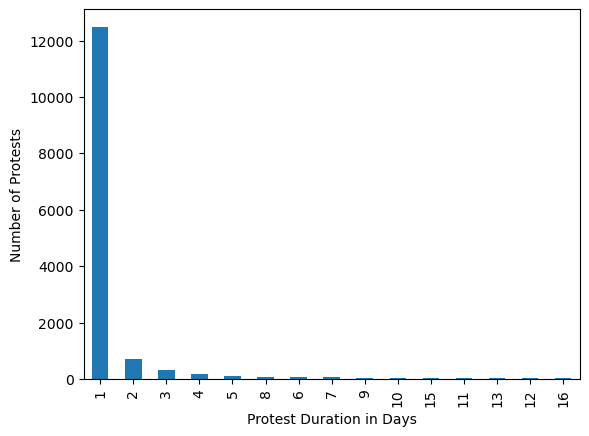

In [70]:
protest_duration = df2.groupby("dur_column").first_response.count().nlargest(n=15).plot(kind= "bar")
protest_duration.set_xlabel("Protest Duration in Days")
protest_duration.set_ylabel("Number of Protests")

In [209]:
#creating mask for countries with a count of more than 20
#dur_column2 = country_violence[("Violent_Response", "count")] > 20
#df2[['dur_column','Violent_Response']].groupby("dur_column").mean()
df2['dur_column2'] = df2['dur_column'].apply(lambda x: str(x) if x < 8 else '7+')

<ipython-input-209-a372be4b0c9a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



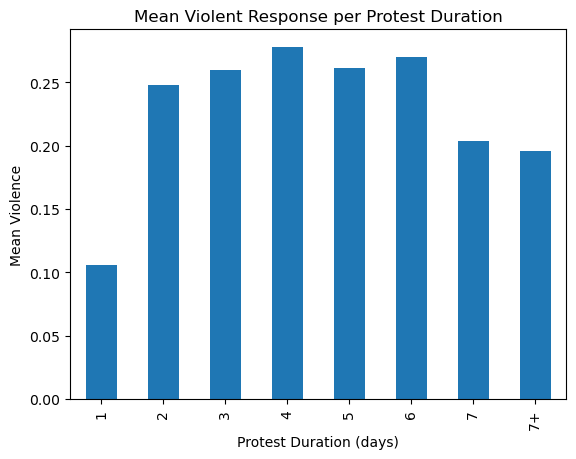

In [210]:
viol_dur = df2[['dur_column2','Violent_Response']].groupby("dur_column2").mean().sort_values(by = "dur_column2", ascending= True).plot(kind='bar',title='Mean Violent Response per Protest Duration', xlabel='Protest Duration (days)', ylabel='Mean Violence')
viol_dur.legend().remove()
plt.style.use('default')
plt.savefig('9_Violence_Across_Duration.png')

In [294]:
dur_contingency_table = pd.crosstab(df2['dur_column2'],
                            df2['Violent_Response'], 
                               margins = False)
dur_contingency_table

Violent_Response  False  True 
dur_column2                   
1                 11160   1321
2                   538    177
3                   225     79
4                   117     45
5                    82     29
6                    46     17
7                    43     11
7+                  476    116

In [295]:
#Below we perform a chi-squared test to verify whether the observed violence at each duration is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(dur_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=14.067, stat=288.364
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [211]:
'''viol_dur = df2[['dur_column','Violent_Response']].groupby("dur_column").mean().sort_values(by = "dur_column", ascending= False).plot(kind='bar',title='Average Violent Response per Protest Duration', xlabel='Feature: Protest Duration', ylabel='Mean: Violence')
viol_dur.legend().remove()
plt.style.use('default')
plt.savefig('Violence_Across_protest_duration.png')'''

'viol_dur = df2[[\'dur_column\',\'Violent_Response\']].groupby("dur_column").mean().sort_values(by = "dur_column", ascending= False).plot(kind=\'bar\',title=\'Average Violent Response per Protest Duration\', xlabel=\'Feature: Protest Duration\', ylabel=\'Mean: Violence\')\nviol_dur.legend().remove()\nplt.style.use(\'default\')\nplt.savefig(\'Violence_Across_protest_duration.png\')'

## Participant Category Breakdown <a class="anchor" id="part_category"></a>

In [74]:
df.groupby("new_participants_category").protest.count()

new_participants_category
0-50          1128
100-999       4659
1000-1999     1591
2000-4999     1923
50-99         2091
5000-10000    1625
>10000        1448
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

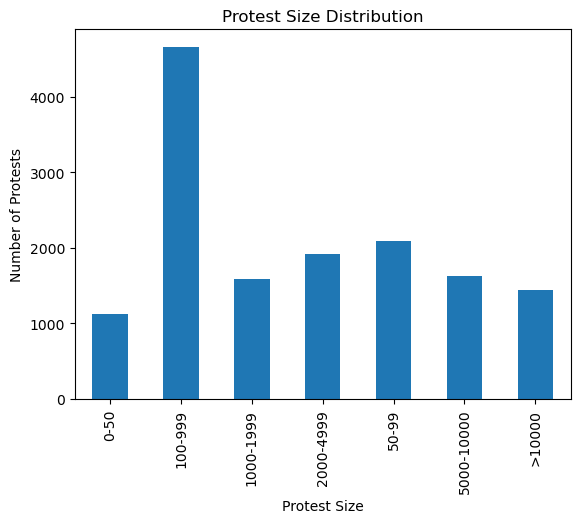

In [75]:
protest_size = df.groupby("new_participants_category").protest.count().plot(kind='bar', title='Protest Size Distribution')
protest_size.set_xlabel("Protest Size")
protest_size.set_ylabel("Number of Protests")


In [76]:
df2[['new_participants_category','Violent_Response']].groupby("new_participants_category").agg(['mean','count'])

Violent_Response      
                                      mean count
new_participants_category                       
0-50                              0.114362  1128
100-999                           0.135437  4659
1000-1999                         0.160277  1591
2000-4999                         0.113365  1923
50-99                             0.117169  2091
5000-10000                        0.118154  1625
>10000                            0.084254  1448

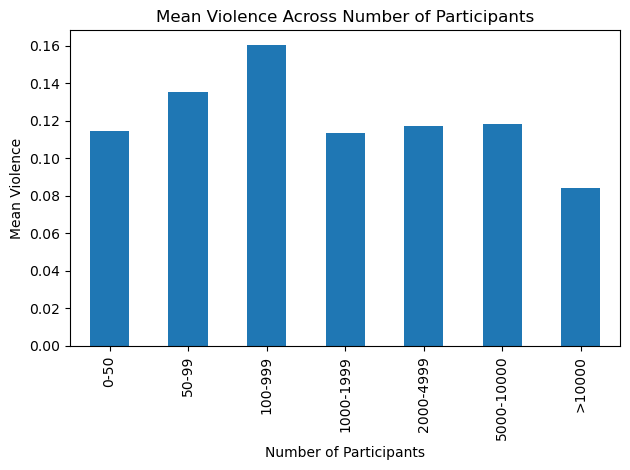

In [245]:
viol_part_cat = df2[['new_participants_category','Violent_Response']].groupby("new_participants_category").mean().plot(kind='bar',xlabel= 'Number of Participants', ylabel = 'Mean Violence', title= 'Mean Violence Across Number of Participants')
viol_part_cat.legend().remove()
ticks = [0,1,2,3,4,5,6]
labels = ['0-50','50-99','100-999','1000-1999', '2000-4999','5000-10000','>10000']
viol_part_cat.set_xticks(ticks)
viol_part_cat.set_xticklabels(labels)
plt.tight_layout()
plt.style.use('default')
plt.savefig('10_Violence_Across_participant_cat.png')


In [296]:
part_contingency_table = pd.crosstab(df2['new_participants_category'],
                            df2['Violent_Response'], 
                               margins = False)
part_contingency_table

Violent_Response           False  True 
new_participants_category              
0-50                         999    129
100-999                     4028    631
1000-1999                   1336    255
2000-4999                   1705    218
50-99                       1846    245
5000-10000                  1433    192
>10000                      1326    122

In [297]:
#Below we perform a chi-squared test to verify whether the observed violence at each duration is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(part_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=12.592, stat=50.359
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## More than one demand Breakdown <a class="anchor" id="multidemands"></a>

In [78]:
multi_demand = pd.DataFrame(df2[['demands_count', 'Violent_Response']].groupby('demands_count').agg(['mean','count']))

In [79]:
multi_demand

Violent_Response       
                          mean  count
demands_count                        
1                     0.124387  11818
2                     0.120426   2350
3                     0.129252    294
4                     0.200000     20

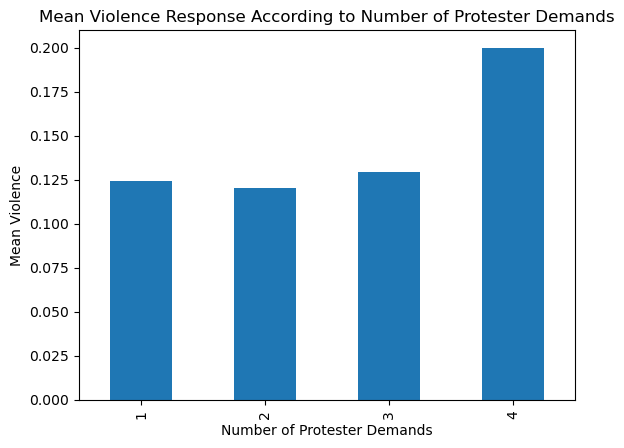

In [213]:
multi_demand[('Violent_Response','mean')].plot(kind='bar')
plt.title('Mean Violence Response According to Number of Protester Demands')
plt.xlabel('Number of Protester Demands')
plt.ylabel('Mean Violence')
plt.style.use('default')
plt.savefig('11_Avg_Violence_multidemand.png')

In [298]:
multidemand_contingency_table = pd.crosstab(df2['demands_count'],
                            df2['Violent_Response'], 
                               margins = False)
multidemand_contingency_table

Violent_Response  False  True 
demands_count                 
1                 10348   1470
2                  2067    283
3                   256     38
4                    16      4

In [299]:
#Below we perform a chi-squared test to verify whether the observed violence at each duration is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(multidemand_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=7.815, stat=1.431
Independent (fail to reject H0)
significance=0.050, p=0.698
Independent (fail to reject H0)


## More than one response Breakdown <a class="anchor" id="multiresponse"></a>

In [81]:
multi_response = pd.DataFrame(df2[['responses_count', 'Violent_Response']].groupby('responses_count').agg(['mean','count']))

In [82]:
multi_response

Violent_Response       
                            mean  count
responses_count                        
1                       0.030084  11767
2                       0.369739   1877
3                       0.864952    622
4                       0.959770    174
5                       1.000000     34
6                       1.000000      8

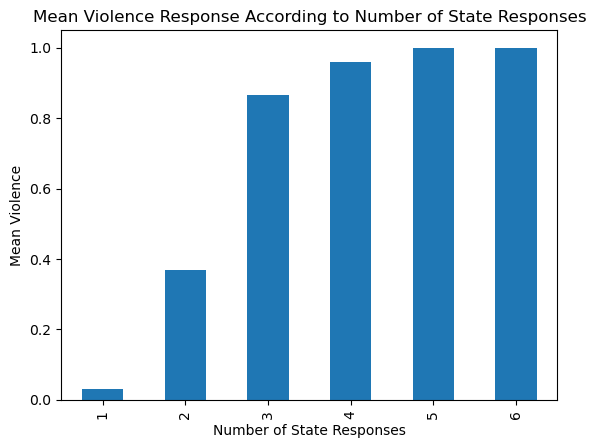

In [214]:
multi_response[('Violent_Response','mean')].sort_values(ascending= True).plot(kind='bar')
plt.title('Mean Violence Response According to Number of State Responses')
plt.xlabel('Number of State Responses')
plt.ylabel('Mean Violence')
plt.style.use('default')
plt.savefig('12_Avg_Violence_multiresponse.png')

*null hypothesis:* Number of state responses is unrelated to violence /n
*alternative hyphothesis:* State responses are related to violence

In [84]:
#one_response = df2['responses_count'] == 1

In [85]:
#more_than_one = df2['responses_count'] > 1

In [300]:
multiresponse_contingency_table = pd.crosstab(df2['responses_count'],
                            df2['Violent_Response'], 
                               margins = False)
multiresponse_contingency_table

Violent_Response  False  True 
responses_count               
1                 11413    354
2                  1183    694
3                    84    538
4                     7    167
5                     0     34
6                     0      8

In [301]:
#Below we perform a chi-squared test to verify whether the observed violence at each duration is statistically significant

# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(multiresponse_contingency_table)
#print('dof=%d' % dof)
#print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=11.070, stat=6560.715
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## Protestor Violence Breakdown <a class="anchor" id="prot_violence"></a>

In [86]:
prot_violence = pd.DataFrame(df2[['protesterviolence', 'Violent_Response']].groupby('protesterviolence').agg(['mean','count']))

In [87]:
prot_violence

Violent_Response       
                              mean  count
protesterviolence                        
False                      0.05668  10674
True                       0.31250   3808

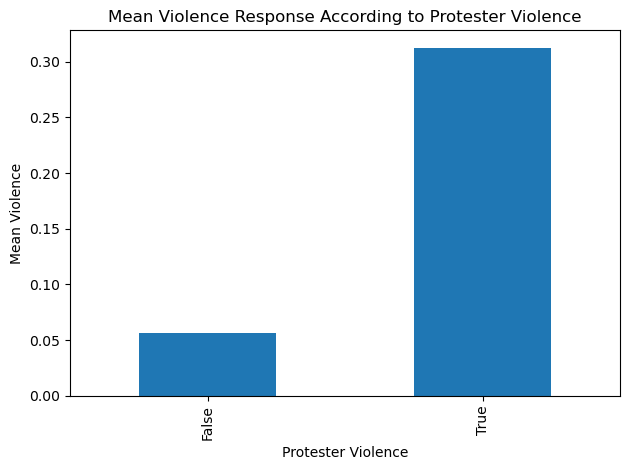

In [243]:
prot_violence[('Violent_Response','mean')].sort_values(ascending= True).plot(kind='bar')
plt.title('Mean Violence Response According to Protester Violence')
plt.xlabel('Protester Violence')
plt.ylabel('Mean Violence')
plt.tight_layout()
plt.style.use('default')
plt.savefig('13_Avg_Violence_prot_violence.png')

## Univariate Chart of target

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

L= len(df)

resp_bar = go.Figure(data=[go.Bar(x=['accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings'], 
                              y =[df['accomodation'].sum(),
                                  df['arrests'].sum(),
                                  df['beatings'].sum(), 
                                  df['crowd_dispersal'].sum(),
                                  df['ignore'].sum(),
                                  df['killings'].sum(),
                                  df['shootings'].sum()], 
                                  name='True'),
                       go.Bar(x=['accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings'], 
                              y =[L-df['accomodation'].sum(),
                                  L-df['arrests'].sum(),
                                  L-df['beatings'].sum(),
                                  L-df['crowd_dispersal'].sum(),
                                  L-df['ignore'].sum(),
                                  L-df['killings'].sum(), 
                                  L-df['shootings'].sum()], 
                                  name='False')])
resp_bar.update_layout(barmode='stack',   bargap=0.05, width=500, height=400, title = "Response Distribution")


In [90]:
#box plot, for each response, avg number of participants for response. Groupviolent or not

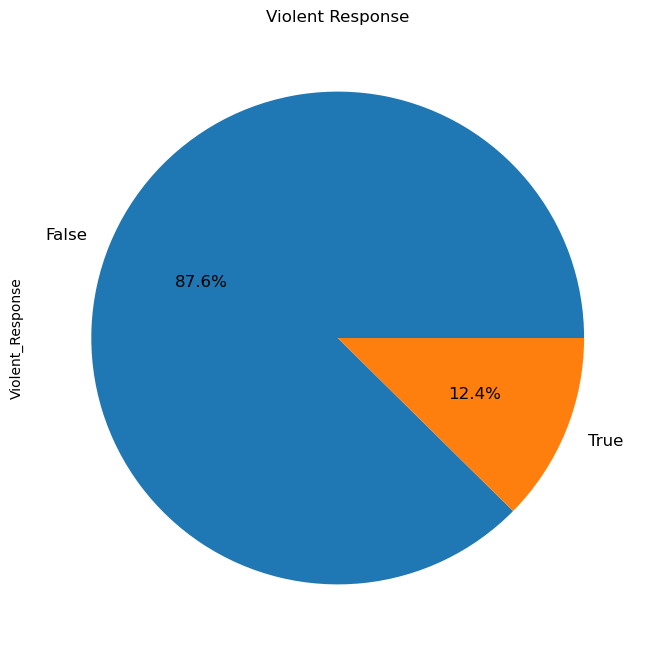

In [91]:
df2.Violent_Response.value_counts().plot(kind='pie',figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('Violent Response')
plt.show()

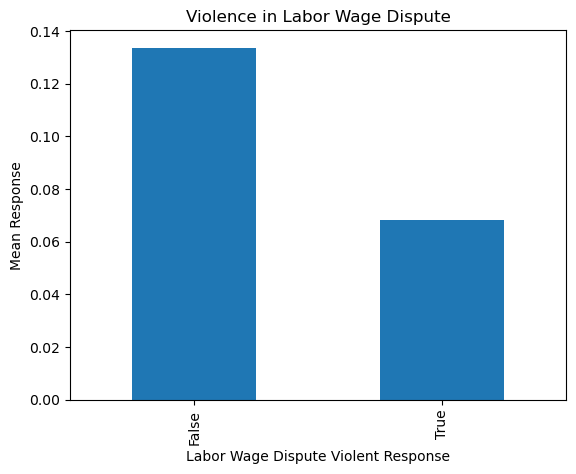

In [92]:
fig1 = df2[['labor_wage_dispute','Violent_Response']].groupby("labor_wage_dispute").mean().plot(kind='bar', title='Violence in Labor Wage Dispute')
fig1.set_xlabel("Labor Wage Dispute Violent Response")
fig1.set_ylabel("Mean Response")
fig1.legend().remove()


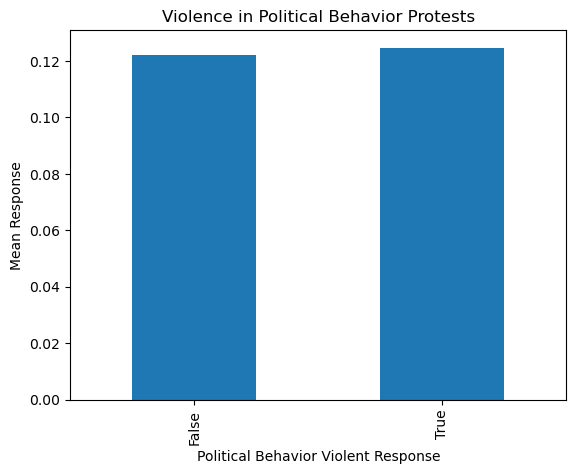

In [93]:
fig2 = df2[['political_behavior','Violent_Response']].groupby("political_behavior").mean().plot(kind='bar', title='Violence in Political Behavior Protests')
fig2.set_xlabel("Political Behavior Violent Response")
fig2.set_ylabel("Mean Response")
fig2.legend().remove()

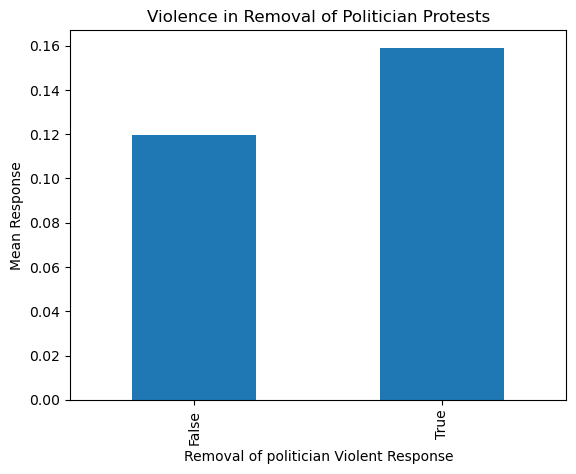

In [94]:
fig3 = df2[['removal_of_politician','Violent_Response']].groupby("removal_of_politician").mean().plot(kind='bar', title='Violence in Removal of Politician Protests')
fig3.set_xlabel("Removal of politician Violent Response")
fig3.set_ylabel("Mean Response")
fig3.legend().remove()

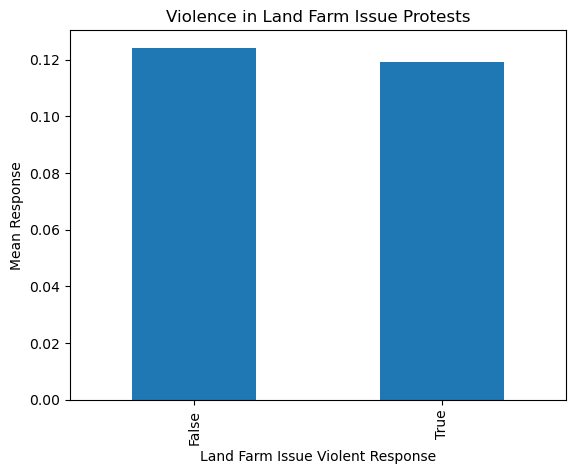

In [95]:
fig4 = df2[['land_farm_issue','Violent_Response']].groupby('land_farm_issue').mean().plot(kind='bar', title='Violence in Land Farm Issue Protests')
fig4.set_xlabel("Land Farm Issue Violent Response")
fig4.set_ylabel("Mean Response")
fig4.legend().remove()

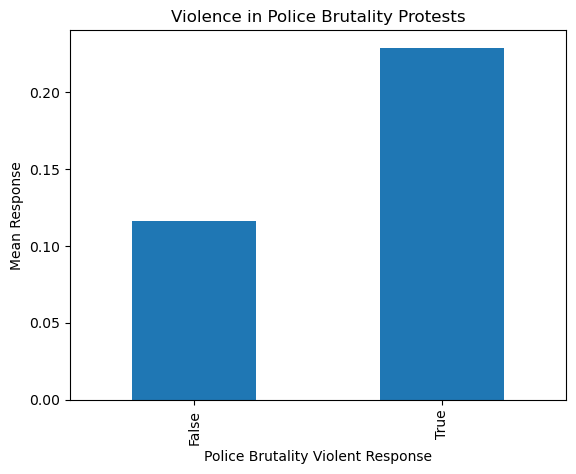

In [96]:
fig5 = df2[['police_brutality','Violent_Response']].groupby('police_brutality').mean().plot(kind='bar', title='Violence in Police Brutality Protests')
fig5.set_xlabel("Police Brutality Violent Response")
fig5.set_ylabel("Mean Response")
fig5.legend().remove()

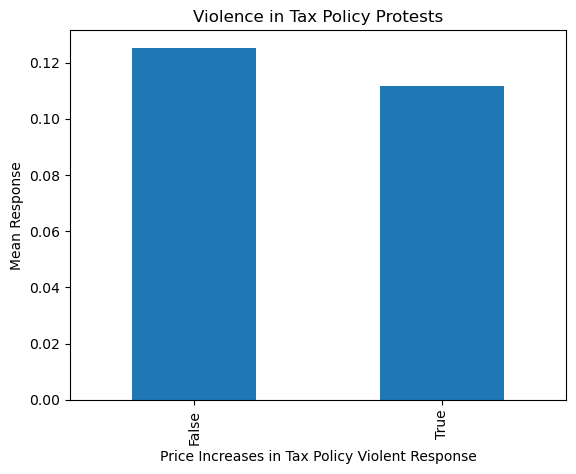

In [97]:
fig6 = df2[['price_increases_tax_policy','Violent_Response']].groupby('price_increases_tax_policy').mean().plot(kind='bar', title='Violence in Tax Policy Protests')
fig6.set_xlabel("Price Increases in Tax Policy Violent Response")
fig6.set_ylabel("Mean Response")
fig6.legend().remove()

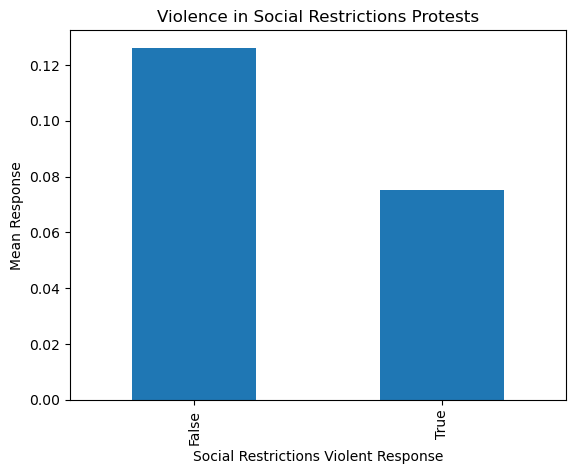

In [98]:
fig7 = df2[['social_restrictions','Violent_Response']].groupby('social_restrictions').mean().plot(kind='bar', title='Violence in Social Restrictions Protests')
fig7.set_xlabel("Social Restrictions Violent Response")
fig7.set_ylabel("Mean Response")
fig7.legend().remove()

In [99]:
#sns.catplot(x='labor_wage_dispute', col='Violent_Response',
#data=df2, kind="count", height=7, aspect=.7)
#sns.catplot(x='labor_wage_dispute', col='Violent_Response',
#data=df2, kind="bar", height=4, aspect=.7)

In [100]:
lwd = df2[df2['labor_wage_dispute']==1]

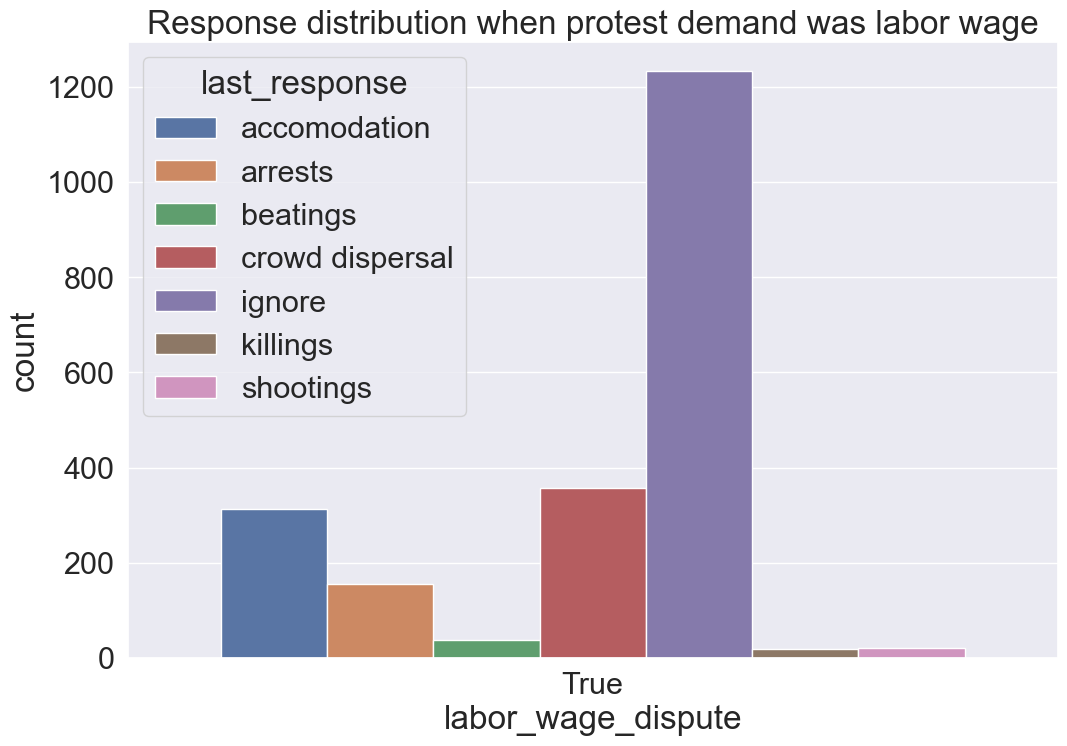

In [101]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= lwd, x='labor_wage_dispute', hue='last_response')
plt.title('Response distribution when protest demand was labor wage')
plt.show()

In [102]:
lfi = df2[df2['land_farm_issue']==1]

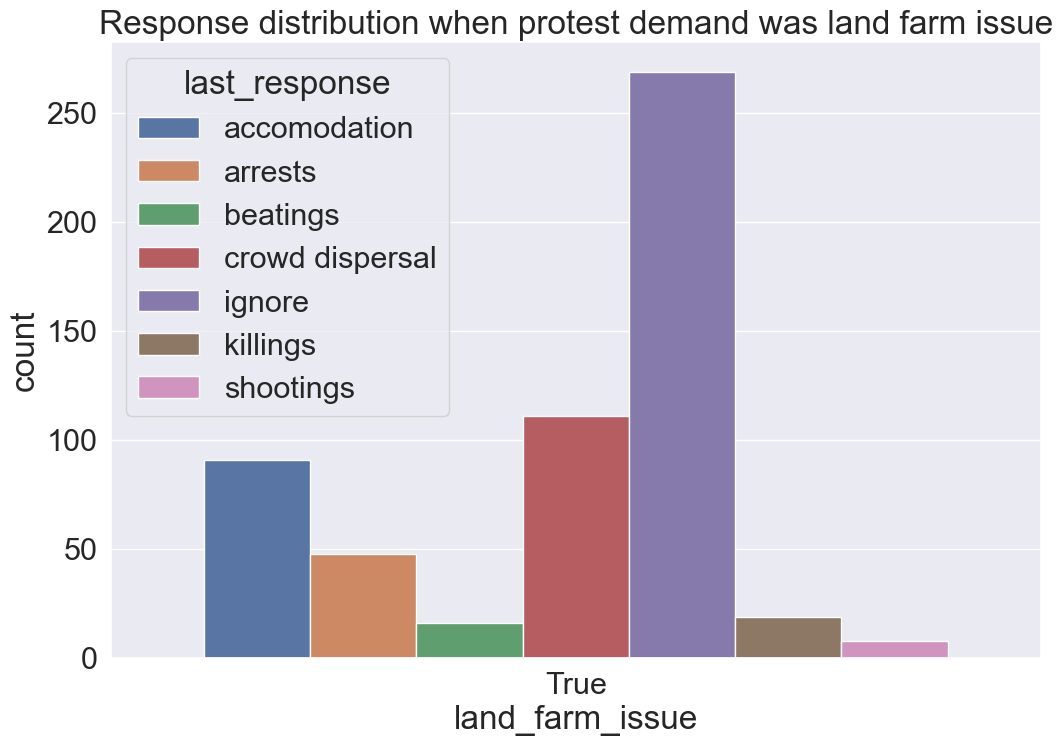

In [103]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= lfi, x='land_farm_issue', hue='last_response')
plt.title('Response distribution when protest demand was land farm issue')
plt.show()

In [104]:
polb = df2[df2['police_brutality']==1]

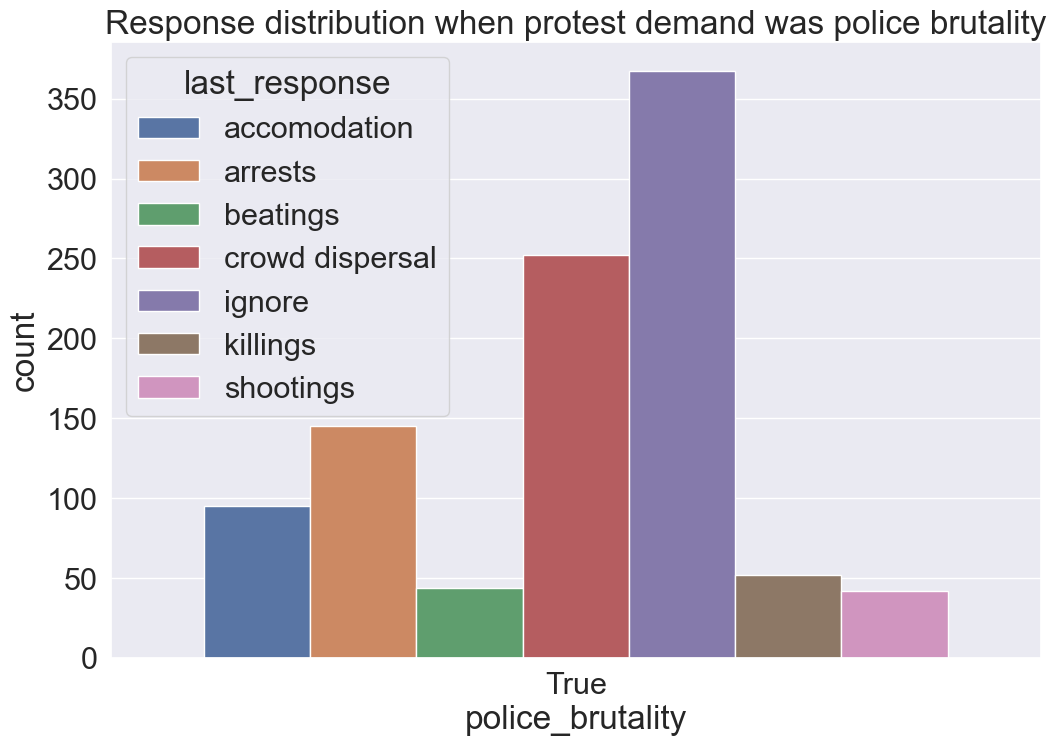

In [105]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= polb, x='police_brutality', hue='last_response')
plt.title('Response distribution when protest demand was police brutality')
plt.show()

In [106]:
polbeh = df2[df2['political_behavior']==1]

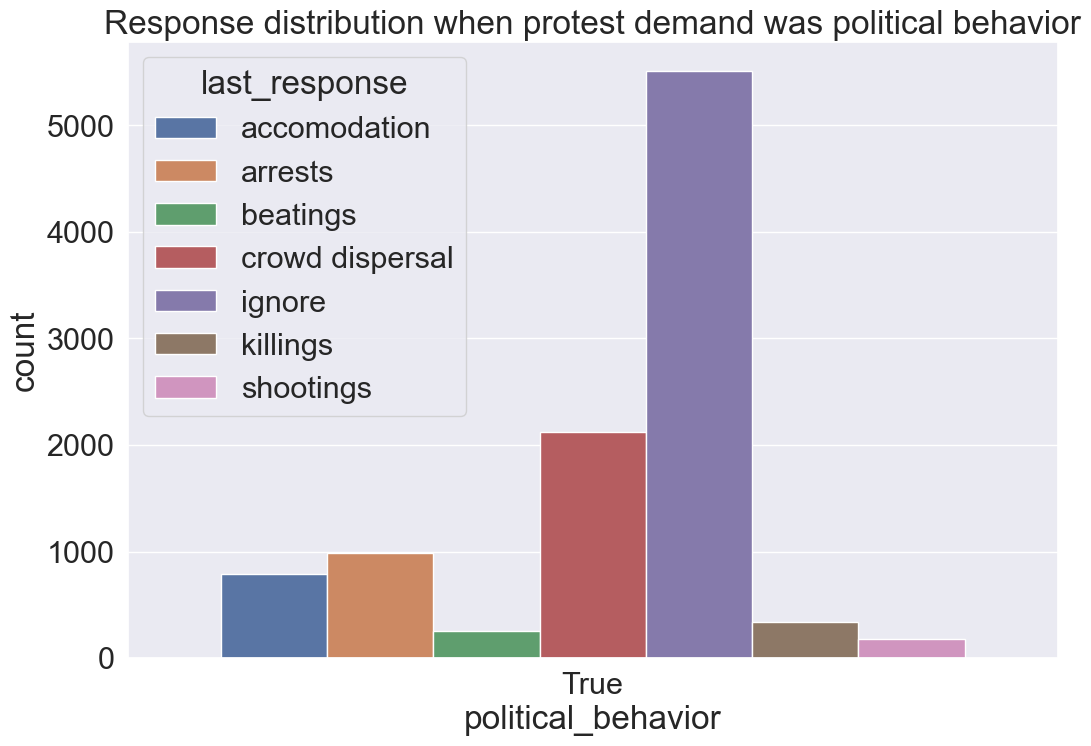

In [107]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= polbeh, x='political_behavior', hue='last_response')
plt.title('Response distribution when protest demand was political behavior')
plt.show()

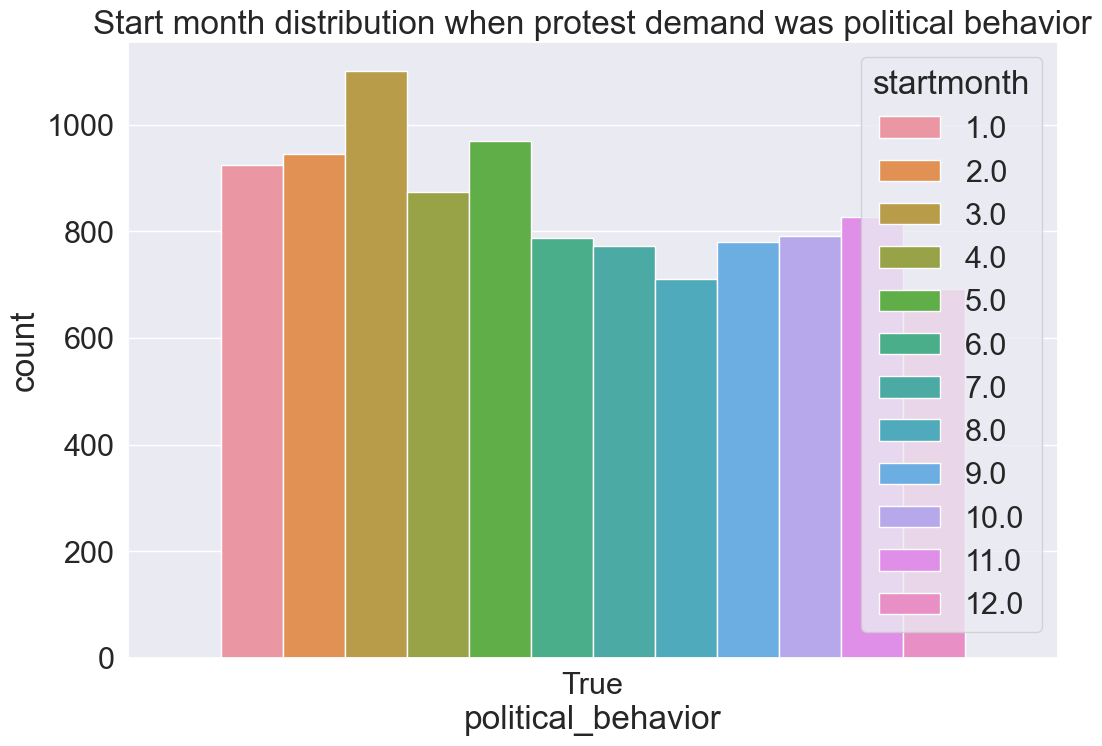

In [108]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= polbeh, x='political_behavior', hue='startmonth')
plt.title('Start month distribution when protest demand was political behavior')
plt.show()

In [109]:
pitp = df2[df2['price_increases_tax_policy']==1]

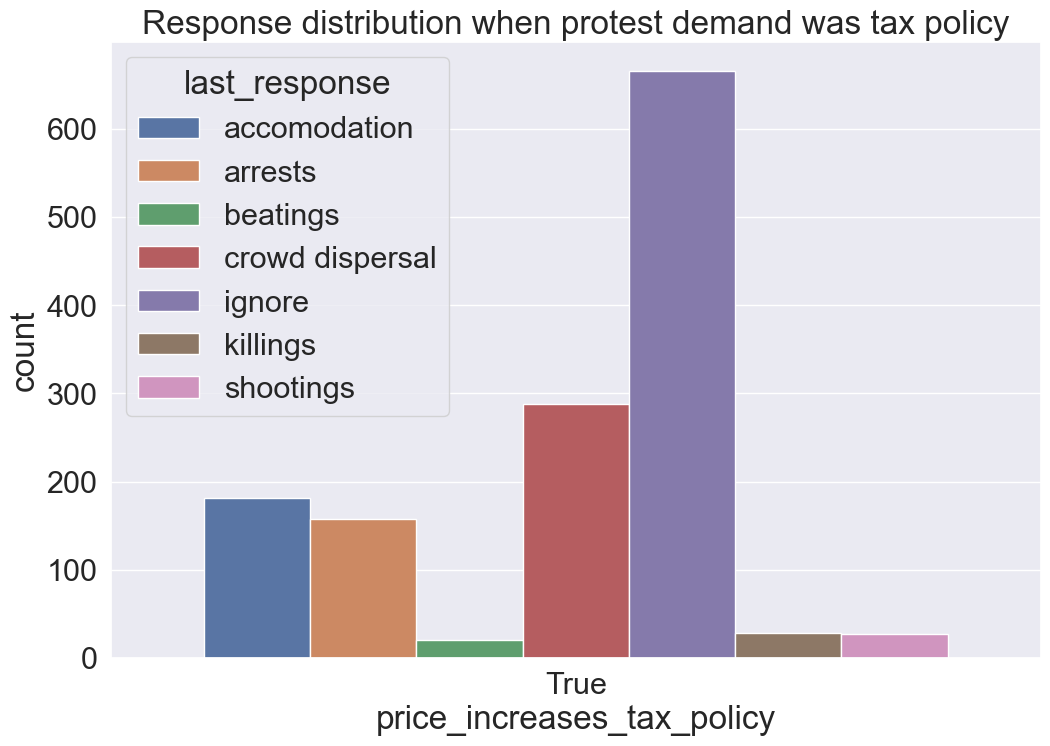

In [110]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= pitp, x='price_increases_tax_policy', hue='last_response')
plt.title('Response distribution when protest demand was tax policy')
plt.show()

In [111]:
rop = df2[df2['removal_of_politician']==1]

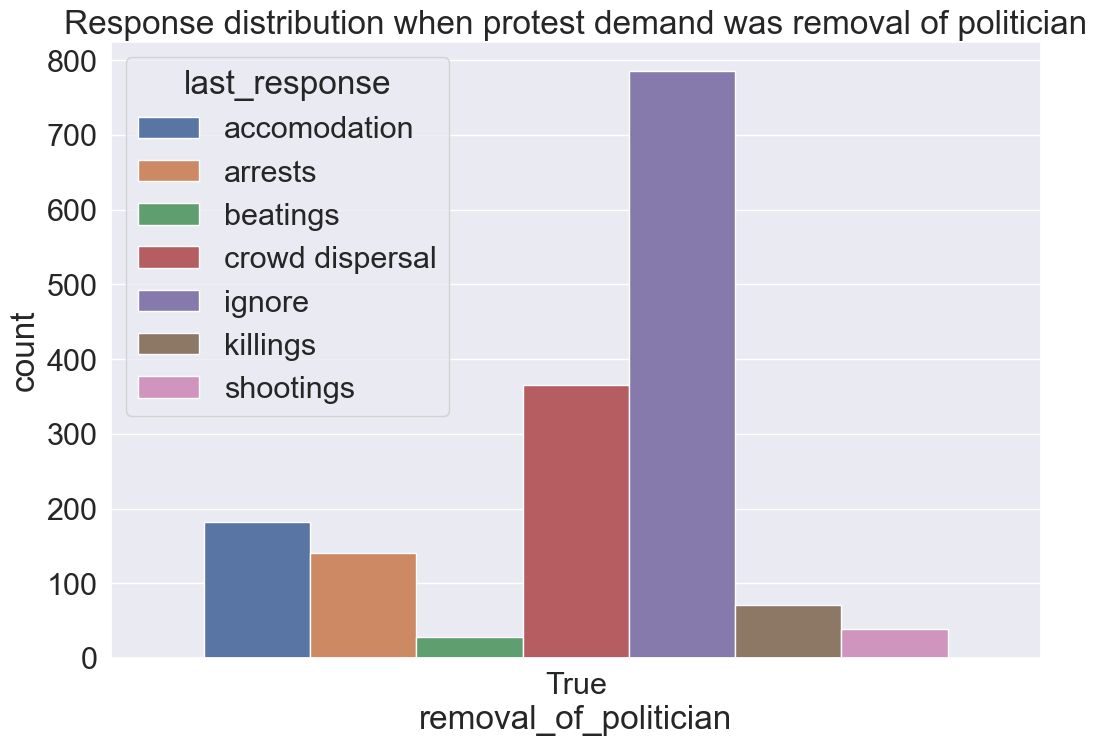

In [112]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= rop, x='removal_of_politician', hue='last_response')
plt.title('Response distribution when protest demand was removal of politician')
plt.show()

In [113]:
sr = df2[df2['social_restrictions']==1]

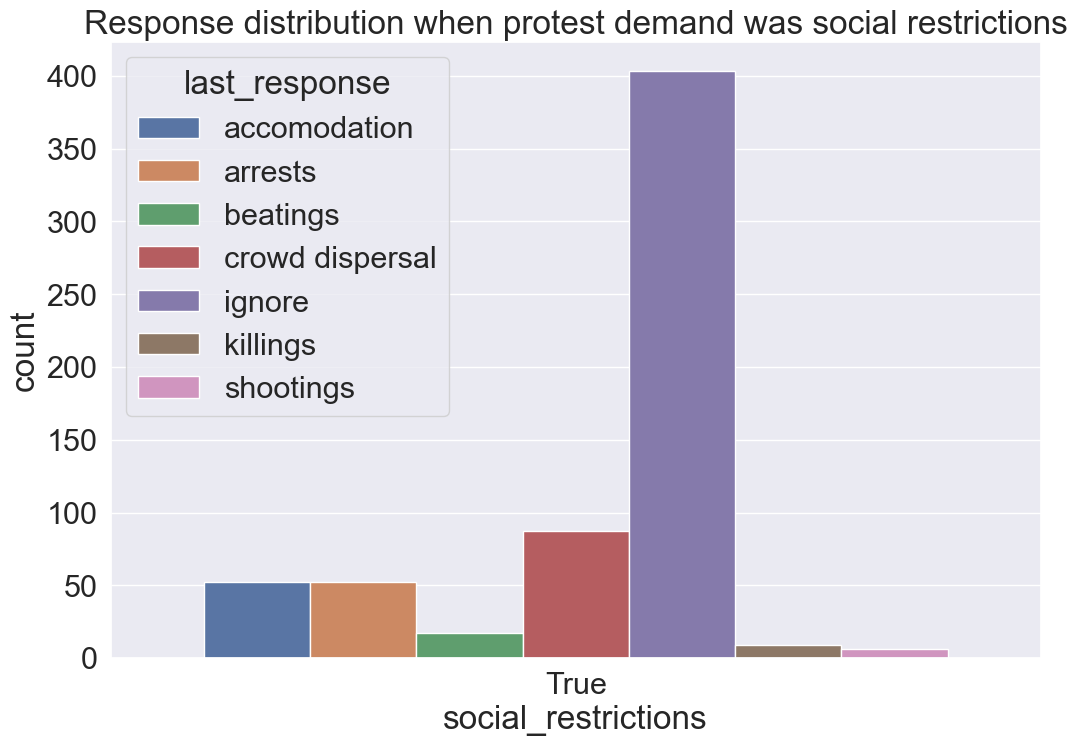

In [114]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= sr, x='social_restrictions', hue='last_response')
plt.title('Response distribution when protest demand was social restrictions')
plt.show()

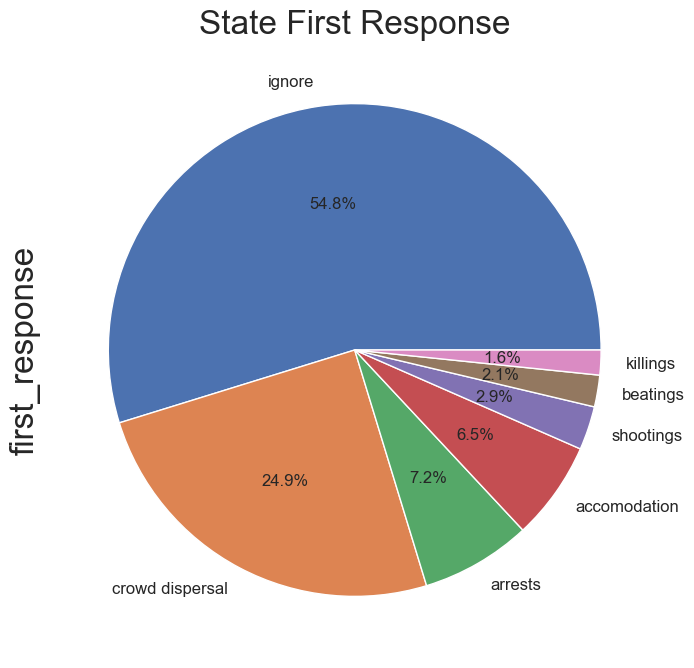

In [115]:
df.first_response.value_counts().plot(kind='pie',figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('State First Response')
plt.show()

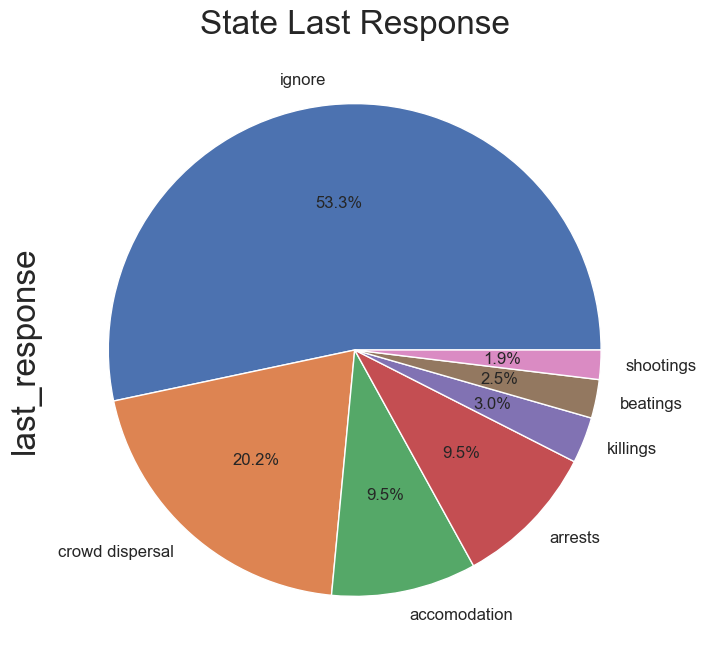

In [116]:
df.last_response.value_counts().plot(kind='pie',figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('State Last Response')
plt.show()

#### Correlation matrix <a class="anchor" id="corr"></a>

In [117]:
df2.corr()

year  participants_int  labor_wage_dispute  \
year                        1.000000         -0.017962           -0.034107   
participants_int           -0.017962          1.000000            0.047243   
labor_wage_dispute         -0.034107          0.047243            1.000000   
land_farm_issue             0.079085         -0.021448           -0.069487   
police_brutality            0.033215         -0.018896           -0.100058   
political_behavior          0.018088          0.014228           -0.351919   
price_increases_tax_policy -0.025942          0.002686            0.011304   
removal_of_politician       0.088623          0.008034           -0.096358   
social_restrictions         0.061901         -0.000651           -0.074075   
accomodation               -0.002478          0.010696            0.075470   
arrests                    -0.004371         -0.016736           -0.041968   
beatings                   -0.071515         -0.017924           -0.035463   
crowd_dispersal             0.020217         -0.019186           -0.032833   
ignore                      0.014459          0.032021            0.038040   
killings                   -0.017029          0.004255           -0.059363   
shootings                  -0.008989         -0.000458           -0.044361   
demands_count               0.114197          0.037924            0.244904   
responses_count            -0.012446          0.002191           -0.031290   
protesterviolence          -0.053315         -0.025130           -0.032690   
Violent_Response           -0.075376         -0.015048           -0.070236   
dur_column                  0.020353          0.001023            0.027343   

                            land_farm_issue  police_brutality  \
year                               0.079085          0.033215   
participants_int                  -0.021448         -0.018896   
labor_wage_dispute                -0.069487         -0.100058   
land_farm_issue                    1.000000         -0.032041   
police_brutality                  -0.032041          1.000000   
political_behavior                -0.165870         -0.232605   
price_increases_tax_policy        -0.046592         -0.061755   
removal_of_politician             -0.055139         -0.054519   
social_restrictions               -0.028644         -0.033656   
accomodation                       0.048339          0.005638   
arrests                            0.001783          0.047373   
beatings                          -0.006301          0.047168   
crowd_dispersal                    0.006139          0.070210   
ignore                            -0.019755         -0.093224   
killings                          -0.001282          0.046402   
shootings                         -0.007056          0.065770   
demands_count                      0.103530          0.136847   
responses_count                    0.007885          0.064992   
protesterviolence                  0.011552          0.094066   
Violent_Response                  -0.002884          0.086427   
dur_column                         0.026053          0.004549   

                            political_behavior  price_increases_tax_policy  \
year                                  0.018088                   -0.025942   
participants_int                      0.014228                    0.002686   
labor_wage_dispute                   -0.351919                    0.011304   
land_farm_issue                      -0.165870                   -0.046592   
police_brutality                     -0.232605                   -0.061755   
political_behavior                    1.000000                   -0.254219   
price_increases_tax_policy           -0.254219                    1.000000   
removal_of_politician                -0.132967                   -0.056459   
social_restrictions                  -0.134480                   -0.055912   
accomodation                         -0.091301                    0.041894   
arrests                   

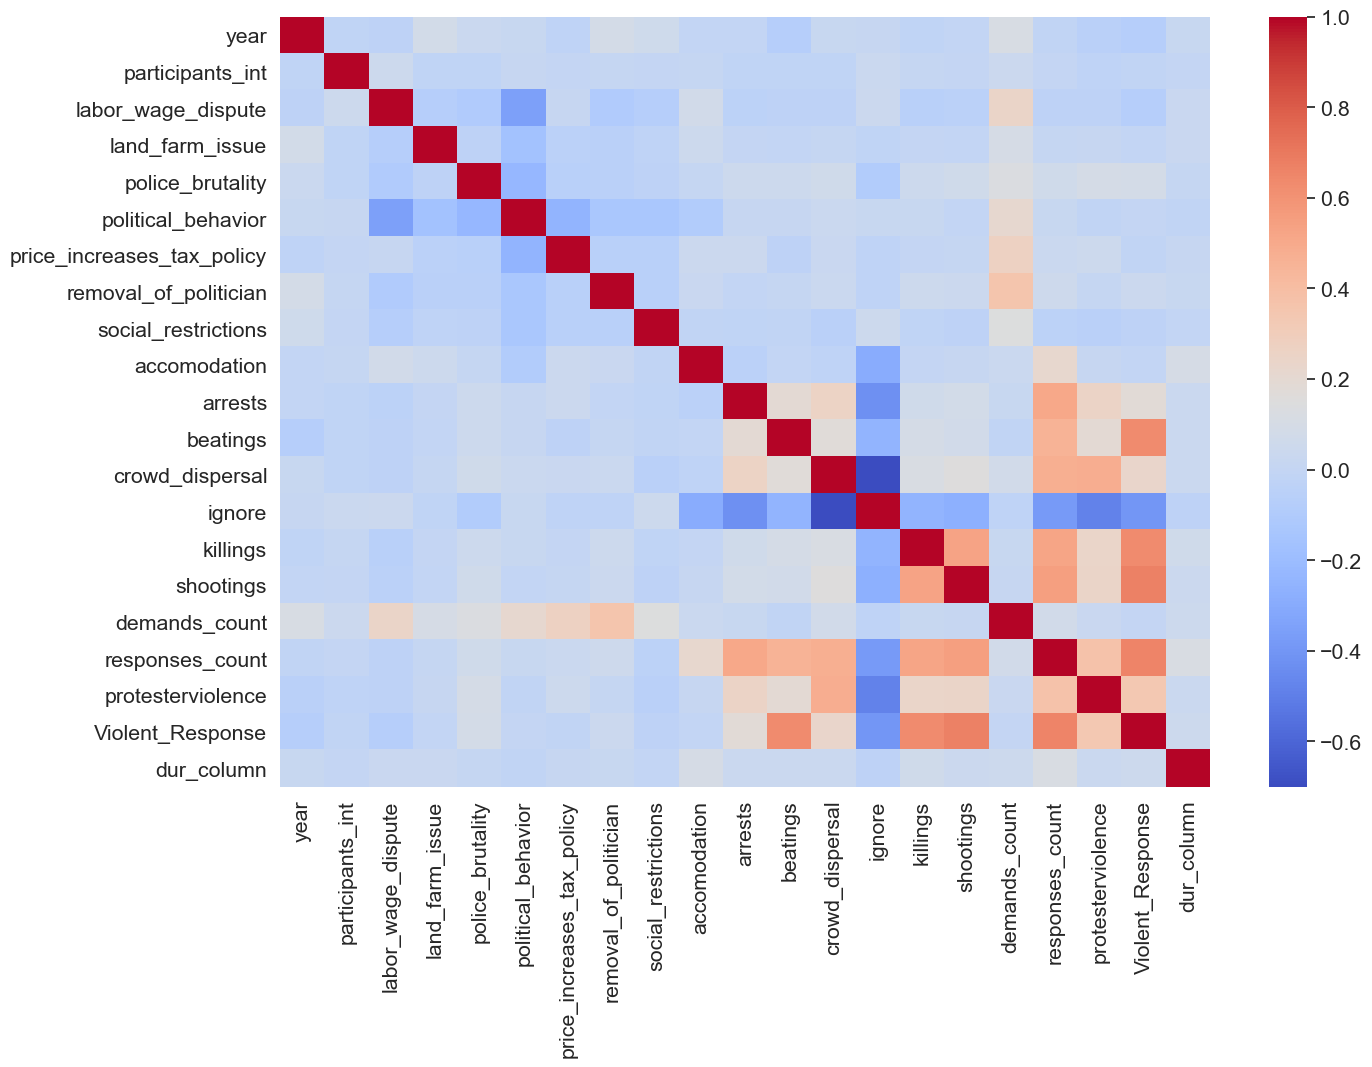

In [118]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(df2.corr(), annot= False, cmap = "coolwarm")
plt.show()

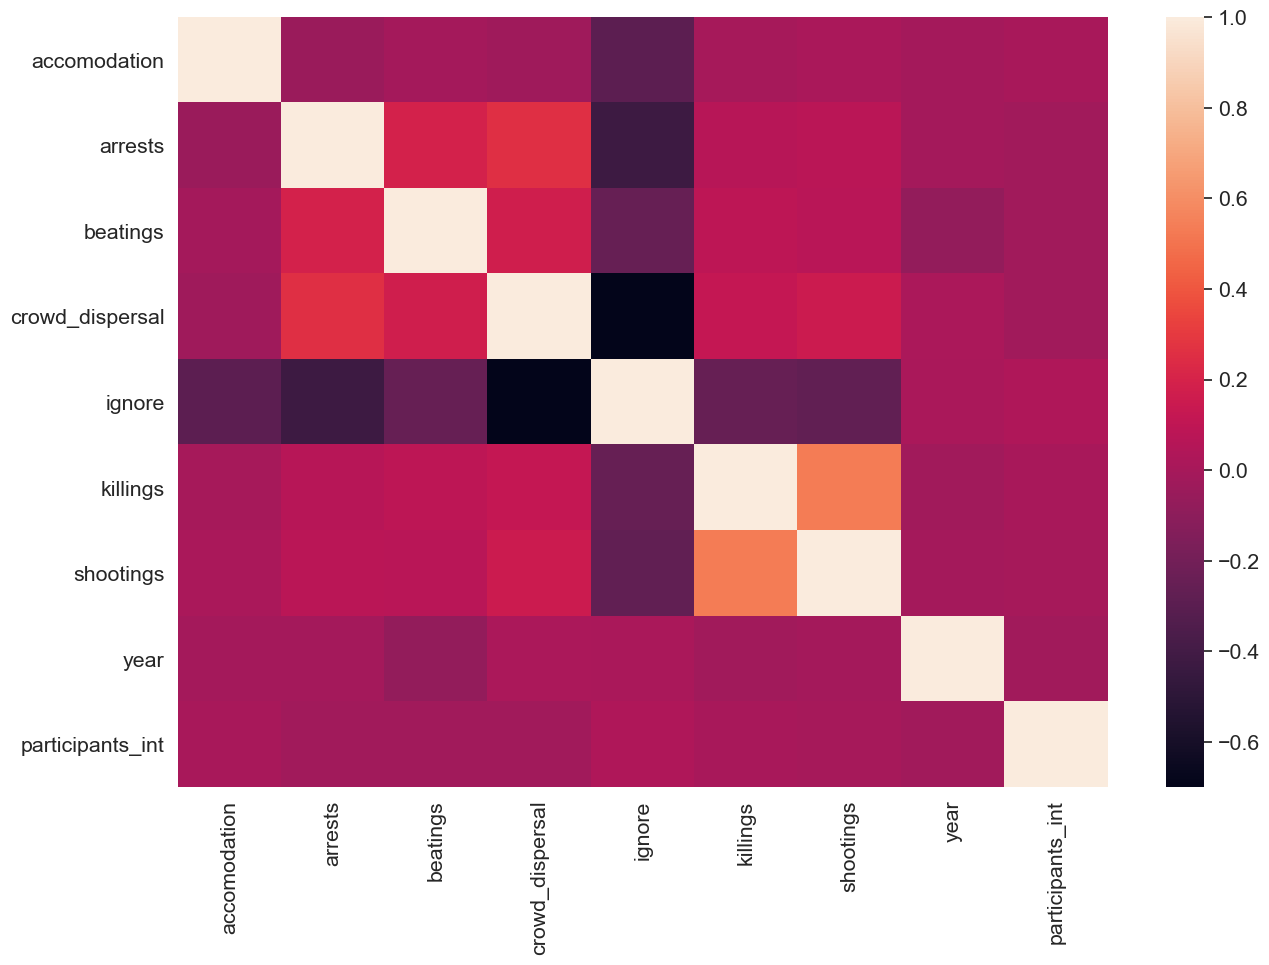

In [119]:
corrMatrix_2 = df2[['accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings','country', 'year', 'region','startmonth','participants_int','new_participants_category','start_date','end_date']].corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(corrMatrix_2, annot= False)
plt.show()

#### Stacked graph for State response <a class="anchor" id="stack"></a>

In [120]:
# Data
r = [0,1,2,3,4,5,6]

In [121]:
responsecols = ['stateresponse1_y', 'stateresponse2_y', 'stateresponse3_y', 'stateresponse4_y',
       'stateresponse5_y', 'stateresponse6_y', 'stateresponse7_y']

In [122]:
sr_list = [df[responsenum].value_counts().to_dict() for responsenum in responsecols]

In [123]:
sr_list

[{'ignore': 7933,
  'crowd dispersal': 3610,
  'arrests': 1049,
  'accomodation': 937,
  'shootings': 415,
  'beatings': 300,
  'killings': 236},
 {'arrests': 692,
  'crowd dispersal': 568,
  'accomodation': 382,
  'beatings': 369,
  'shootings': 359,
  'killings': 311,
  'ignore': 33},
 {'arrests': 212,
  'crowd dispersal': 207,
  'killings': 175,
  'accomodation': 92,
  'beatings': 80,
  'shootings': 72,
  'ignore': 10},
 {'accomodation': 64,
  'arrests': 50,
  'crowd dispersal': 40,
  'killings': 38,
  'shootings': 19,
  'beatings': 19},
 {'accomodation': 16,
  'arrests': 14,
  'crowd dispersal': 9,
  'killings': 7,
  'shootings': 3,
  'beatings': 3},
 {'accomodation': 9,
  'crowd dispersal': 3,
  'killings': 2,
  'beatings': 1,
  'arrests': 1},
 {'accomodation': 3, 'arrests': 2, 'killings': 1, 'beatings': 1}]

In [124]:
sr_list[0]

{'ignore': 7933,
 'crowd dispersal': 3610,
 'arrests': 1049,
 'accomodation': 937,
 'shootings': 415,
 'beatings': 300,
 'killings': 236}

In [125]:
unique_responses = sr_list[0].keys()

totals = {}

for response in unique_responses:
    totals[response] = 0

    for dic in sr_list:
        if response in dic:

            totals[response] += dic[response]

In [126]:
totals

{'ignore': 7976,
 'crowd dispersal': 4437,
 'arrests': 2020,
 'accomodation': 1503,
 'shootings': 868,
 'beatings': 773,
 'killings': 770}

In [127]:
np.sum(list(sr_list[0].values()))

14480

In [128]:
response_bars = []
response_bars_dict = []
response_types = sr_list[0].keys()

for response in sr_list:
    newlist = []
    newdict = {}
    for response_type in response_types:
        if response_type in response:
            newlist.append(response[response_type]/np.sum(list(response.values())))
            newdict[response_type] = response[response_type]/np.sum(list(response.values()))
        else:
            newlist.append(0)
            newdict[response_type] = 0
    response_bars.append(newlist)
    response_bars_dict.append(newdict)
print(response_bars)

[[0.5478591160220995, 0.24930939226519336, 0.07244475138121546, 0.06470994475138121, 0.028660220994475138, 0.020718232044198894, 0.016298342541436465], [0.012159174649963155, 0.2092851879145173, 0.25497420781134855, 0.14075165806927045, 0.132277081798084, 0.13596168017686072, 0.11459100957995579], [0.01179245283018868, 0.24410377358490565, 0.25, 0.10849056603773585, 0.08490566037735849, 0.09433962264150944, 0.20636792452830188], [0, 0.17391304347826086, 0.21739130434782608, 0.2782608695652174, 0.08260869565217391, 0.08260869565217391, 0.16521739130434782], [0, 0.17307692307692307, 0.2692307692307692, 0.3076923076923077, 0.057692307692307696, 0.057692307692307696, 0.1346153846153846], [0, 0.1875, 0.0625, 0.5625, 0, 0.0625, 0.125], [0, 0, 0.2857142857142857, 0.42857142857142855, 0, 0.14285714285714285, 0.14285714285714285]]


In [129]:
sr_list[0].keys()

dict_keys(['ignore', 'crowd dispersal', 'arrests', 'accomodation', 'shootings', 'beatings', 'killings'])

In [130]:
np.sum(response_bars[0])

1.0

In [131]:
response_bars[1]

[0.012159174649963155,
 0.2092851879145173,
 0.25497420781134855,
 0.14075165806927045,
 0.132277081798084,
 0.13596168017686072,
 0.11459100957995579]

In [132]:
response_bars[2]

[0.01179245283018868,
 0.24410377358490565,
 0.25,
 0.10849056603773585,
 0.08490566037735849,
 0.09433962264150944,
 0.20636792452830188]

In [133]:
response_bars[3]

[0,
 0.17391304347826086,
 0.21739130434782608,
 0.2782608695652174,
 0.08260869565217391,
 0.08260869565217391,
 0.16521739130434782]

In [134]:
response_bars[4]

[0,
 0.17307692307692307,
 0.2692307692307692,
 0.3076923076923077,
 0.057692307692307696,
 0.057692307692307696,
 0.1346153846153846]

In [135]:
response_bars[5]

[0, 0.1875, 0.0625, 0.5625, 0, 0.0625, 0.125]

In [136]:
response_bars[6]

[0,
 0,
 0.2857142857142857,
 0.42857142857142855,
 0,
 0.14285714285714285,
 0.14285714285714285]

In [137]:
response_bars_horizontal = [[bar[0] for bar in response_bars],[bar[1] for bar in response_bars],[bar[2] for bar in response_bars],[bar[3] for bar in response_bars], [bar[4] for bar in response_bars], [bar[5] for bar in response_bars],[bar[6] for bar in response_bars]]


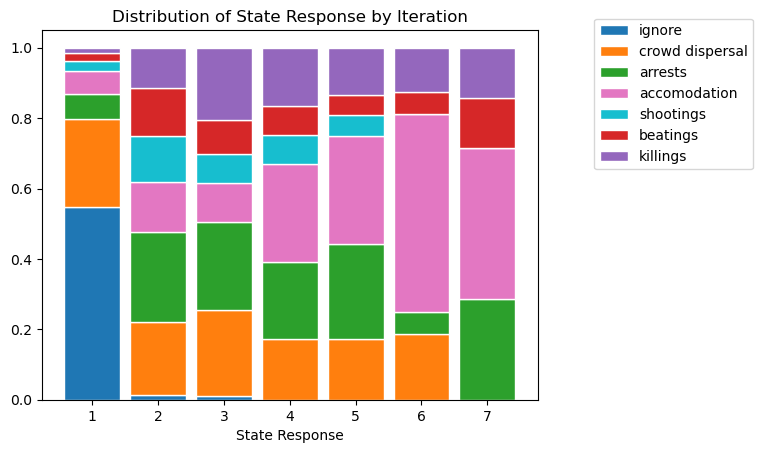

In [374]:
# plot
barWidth = 0.85
names = ('1','2','3','4','5','6','7')
# Create 1/green Bars
plt.bar(r, [bar[0] for bar in response_bars], color='C0', edgecolor='white', width=barWidth, label='ignore')
# Create 2/orange Bars
plt.bar(r, [bar[1] for bar in response_bars], bottom=response_bars_horizontal[0], color='C1', edgecolor='white', width=barWidth, label='crowd dispersal')
# Create 3/blue Bars
plt.bar(r, [bar[2] for bar in response_bars], bottom=[i+j for i,j in zip(response_bars_horizontal[0], response_bars_horizontal[1])], color='C2', edgecolor='white', width=barWidth,  label='arrests')
# Create 4th response Bars
plt.bar(r, [bar[3] for bar in response_bars], bottom=[i+j+k for i,j,k in zip(response_bars_horizontal[0], response_bars_horizontal[1],response_bars_horizontal[2])], color='C6', edgecolor='white', width=barWidth, label='accomodation')
# Create 5th response Bars
plt.bar(r, [bar[4] for bar in response_bars], bottom=[i+j+k+l for i,j,k,l in zip(response_bars_horizontal[0], response_bars_horizontal[1], response_bars_horizontal[2], response_bars_horizontal[3])], color='C9', edgecolor='white', width=barWidth, label='shootings')
# Create 6th response Bars
plt.bar(r, [bar[5] for bar in response_bars], bottom=[i+j+k+l+m for i,j,k,l,m in zip(response_bars_horizontal[0], response_bars_horizontal[1], response_bars_horizontal[2], response_bars_horizontal[3], response_bars_horizontal[4])], color='C3', edgecolor='white', width=barWidth, label='beatings')
# Create 7th response Bars
plt.bar(r, [bar[6] for bar in response_bars], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(response_bars_horizontal[0], response_bars_horizontal[1], response_bars_horizontal[2], response_bars_horizontal[3], response_bars_horizontal[4], response_bars_horizontal[5])], color='C4', edgecolor='white', width=barWidth, label='killings')
# Custom x axis
plt.xticks(r, names)
plt.xlabel("State Response")
plt.title("Distribution of State Response by Iteration")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('14_State_response_stack.png', bbox_inches='tight')
# Show graphic
plt.show()

In [139]:
df2.head()

country         region  year startmonth  participants_int  \
0  Canada  North America  1990        1.0            1500.0   
1  Canada  North America  1990        6.0            1000.0   
2  Canada  North America  1990        7.0             500.0   
3  Canada  North America  1990        7.0             550.0   
4  Canada  North America  1990        8.0             950.0   

  new_participants_category  labor_wage_dispute  land_farm_issue  \
0                 1000-1999                True            False   
1                 1000-1999               False            False   
2                   100-999               False            False   
3                   100-999               False             True   
4                   100-999               False            False   

   police_brutality  political_behavior  ...  demands_count  responses_count  \
0             False                True  ...              2                1   
1             False                True  ...              1                1   
2             False                True  ...              1                1   
3             False               False  ...              1                1   
4             False                True  ...              1                3   

   start_date   end_date protesterviolence Violent_Response hemisphere  \
0  1990-01-15 1990-01-15             False            False   northern   
1  1990-06-25 1990-06-25             False            False   northern   
2  1990-07-01 1990-07-01             False            False   northern   
3  1990-07-12 1990-09-06              True            False   northern   
4  1990-08-14 1990-08-15              True            False   northern   

   season dur_column dur_column2  
0  winter          1           1  
1  summer          1           1  
2  summer          1           1  
3  summer         57          >7  
4  summer          2           2  

[5 rows x 43 columns]

In [140]:
df3 = df2.copy()

In [141]:
df3.head()

country         region  year startmonth  participants_int  \
0  Canada  North America  1990        1.0            1500.0   
1  Canada  North America  1990        6.0            1000.0   
2  Canada  North America  1990        7.0             500.0   
3  Canada  North America  1990        7.0             550.0   
4  Canada  North America  1990        8.0             950.0   

  new_participants_category  labor_wage_dispute  land_farm_issue  \
0                 1000-1999                True            False   
1                 1000-1999               False            False   
2                   100-999               False            False   
3                   100-999               False             True   
4                   100-999               False            False   

   police_brutality  political_behavior  ...  demands_count  responses_count  \
0             False                True  ...              2                1   
1             False                True  ...              1                1   
2             False                True  ...              1                1   
3             False               False  ...              1                1   
4             False                True  ...              1                3   

   start_date   end_date protesterviolence Violent_Response hemisphere  \
0  1990-01-15 1990-01-15             False            False   northern   
1  1990-06-25 1990-06-25             False            False   northern   
2  1990-07-01 1990-07-01             False            False   northern   
3  1990-07-12 1990-09-06              True            False   northern   
4  1990-08-14 1990-08-15              True            False   northern   

   season dur_column dur_column2  
0  winter          1           1  
1  summer          1           1  
2  summer          1           1  
3  summer         57          >7  
4  summer          2           2  

[5 rows x 43 columns]

In [142]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country                     14482 non-null  object        
 1   region                      14482 non-null  category      
 2   year                        14482 non-null  int64         
 3   startmonth                  14482 non-null  category      
 4   participants_int            14465 non-null  float64       
 5   new_participants_category   14465 non-null  category      
 6   labor_wage_dispute          14482 non-null  bool          
 7   land_farm_issue             14482 non-null  bool          
 8   police_brutality            14482 non-null  bool          
 9   political_behavior          14482 non-null  bool          
 10  price_increases_tax_policy  14482 non-null  bool          
 11  removal_of_politician       14482 non-null  bool      

In [143]:
df3.drop(columns=['country', 'participants_int','protesterdemand1_y','protesterdemand2_y','protesterdemand3_y','protesterdemand4_y','stateresponse1_y','stateresponse2_y','stateresponse3_y','stateresponse4_y','stateresponse5_y','stateresponse6_y','stateresponse7_y', 'start_date','end_date' ] , inplace=True)

In [144]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   region                      14482 non-null  category
 1   year                        14482 non-null  int64   
 2   startmonth                  14482 non-null  category
 3   new_participants_category   14465 non-null  category
 4   labor_wage_dispute          14482 non-null  bool    
 5   land_farm_issue             14482 non-null  bool    
 6   police_brutality            14482 non-null  bool    
 7   political_behavior          14482 non-null  bool    
 8   price_increases_tax_policy  14482 non-null  bool    
 9   removal_of_politician       14482 non-null  bool    
 10  social_restrictions         14482 non-null  bool    
 11  accomodation                14482 non-null  bool    
 12  arrests                     14482 non-null  bool    
 13  beatings        

In [145]:
df_target = df3[['Violent_Response']]

In [146]:
df_target.head()

Violent_Response
0             False
1             False
2             False
3             False
4             False

In [147]:
df_encoded = pd.get_dummies(df3, columns=None)

In [148]:
df_encoded

year  labor_wage_dispute  land_farm_issue  police_brutality  \
0      1990                True            False             False   
1      1990               False            False             False   
2      1990               False            False             False   
3      1990               False             True             False   
4      1990               False            False             False   
...     ...                 ...              ...               ...   
14477  2014               False            False             False   
14478  2016               False            False             False   
14479  2017               False             True             False   
14480  2017               False            False             False   
14481  2017               False            False             False   

       political_behavior  price_increases_tax_policy  removal_of_politician  \
0                    True                       False                  False   
1                    True                       False                  False   
2                    True                       False                  False   
3                   False                       False                  False   
4                    True                       False                  False   
...                   ...                         ...                    ...   
14477                True                       False                  False   
14478               False                       False                   True   
14479                True                       False                  False   
14480                True                       False                  False   
14481                True                       False                  False   

       social_restrictions  accomodation  arrests  ...  season_summer  \
0                    False         False    False  ...              0   
1                    False         False    False  ...              1   
2                    False         False    False  ...              1   
3                    False          True    False  ...              1   
4                    False          True     True  ...              1   
...                    ...           ...      ...  ...            ...   
14477                False         False    False  ...              1   
14478                False         False    False  ...              0   
14479                False          True    False  ...              0   
14480                False         False    False  ...              0   
14481                False         False    False  ...              0   

       season_winter  dur_column2_1  dur_column2_2  dur_column2_3  \
0                  1              1              0              0   
1                  0              1              0              0   
2                  0              1              0              0   
3                  0              0              0              0   
4                  0              0              1              0   
...              ...            ...            ...            ...   
14477              0              0              0              1   
14478              0              0              0              0   
14479              1              1              0              0   
14480              1              1              0              0   
14481              0              1              0              0   

       dur_column2_4  dur_column2_5  dur_column2_6  dur_column2_7  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
14477           

In [149]:
df_encoded.drop(columns = ['Violent_Response','accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings'], inplace= True)

In [150]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 67 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   year                                  14482 non-null  int64
 1   labor_wage_dispute                    14482 non-null  bool 
 2   land_farm_issue                       14482 non-null  bool 
 3   police_brutality                      14482 non-null  bool 
 4   political_behavior                    14482 non-null  bool 
 5   price_increases_tax_policy            14482 non-null  bool 
 6   removal_of_politician                 14482 non-null  bool 
 7   social_restrictions                   14482 non-null  bool 
 8   demands_count                         14482 non-null  int64
 9   responses_count                       14482 non-null  int64
 10  protesterviolence                     14482 non-null  bool 
 11  dur_column                            144

In [151]:
#Creating new Df that doesn't contain any target data- removing violent response and first and last response 
df_encoded2 = df_encoded.copy()

In [152]:
df_encoded2.drop(df_encoded2.iloc[:,39:53], axis = 1, inplace = True )

In [153]:
df_encoded2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   year                                  14482 non-null  int64
 1   labor_wage_dispute                    14482 non-null  bool 
 2   land_farm_issue                       14482 non-null  bool 
 3   police_brutality                      14482 non-null  bool 
 4   political_behavior                    14482 non-null  bool 
 5   price_increases_tax_policy            14482 non-null  bool 
 6   removal_of_politician                 14482 non-null  bool 
 7   social_restrictions                   14482 non-null  bool 
 8   demands_count                         14482 non-null  int64
 9   responses_count                       14482 non-null  int64
 10  protesterviolence                     14482 non-null  bool 
 11  dur_column                            144

In [221]:
#Creating new Df that doesn't contain any "future" data- removing duration, response count, protester violence
df_encoded3 = df_encoded2.copy()

In [222]:
df_encoded3.drop(columns = ['responses_count','protesterviolence','dur_column'], inplace=True)

In [225]:
df_encoded3.drop(df_encoded3.iloc[:,42:50], axis = 1, inplace = True )

In [226]:
df_encoded3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   year                                  14482 non-null  int64
 1   labor_wage_dispute                    14482 non-null  bool 
 2   land_farm_issue                       14482 non-null  bool 
 3   police_brutality                      14482 non-null  bool 
 4   political_behavior                    14482 non-null  bool 
 5   price_increases_tax_policy            14482 non-null  bool 
 6   removal_of_politician                 14482 non-null  bool 
 7   social_restrictions                   14482 non-null  bool 
 8   demands_count                         14482 non-null  int64
 9   region_Africa                         14482 non-null  uint8
 10  region_Asia                           14482 non-null  uint8
 11  region_Central America                144

Random Forest Prep

In [154]:
#deleted country
#feature_names = ['region','year','startmonth','new_participants_category', 'labor_wage_dispute','land_farm_issue','police_brutality','political_behavior','price_increases_tax_policy','removal_of_politician','social_restrictions','first_response','last_response','demands_count','responses_count','start_date','end_date', 'protesterviolence', 'hemisphere','season','dur_column']

In [155]:
df_encoded.columns

Index(['year', 'labor_wage_dispute', 'land_farm_issue', 'police_brutality',
       'political_behavior', 'price_increases_tax_policy',
       'removal_of_politician', 'social_restrictions', 'demands_count',
       'responses_count', 'protesterviolence', 'dur_column', 'region_Africa',
       'region_Asia', 'region_Central America', 'region_Europe', 'region_MENA',
       'region_North America', 'region_Oceania', 'region_South America',
       'startmonth_1.0', 'startmonth_2.0', 'startmonth_3.0', 'startmonth_4.0',
       'startmonth_5.0', 'startmonth_6.0', 'startmonth_7.0', 'startmonth_8.0',
       'startmonth_9.0', 'startmonth_10.0', 'startmonth_11.0',
       'startmonth_12.0', 'new_participants_category_0-50',
       'new_participants_category_100-999',
       'new_participants_category_1000-1999',
       'new_participants_category_2000-4999',
       'new_participants_category_50-99',
       'new_participants_category_5000-10000',
       'new_participants_category_>10000', 'first_respon

## Random Forest <a class="anchor" id="random_forest"></a>

In [230]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [231]:
X = pd.DataFrame(df_encoded, columns=df_encoded.columns)
y = np.ravel(df_target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [232]:
X

year  labor_wage_dispute  land_farm_issue  police_brutality  \
0      1990                True            False             False   
1      1990               False            False             False   
2      1990               False            False             False   
3      1990               False             True             False   
4      1990               False            False             False   
...     ...                 ...              ...               ...   
14477  2014               False            False             False   
14478  2016               False            False             False   
14479  2017               False             True             False   
14480  2017               False            False             False   
14481  2017               False            False             False   

       political_behavior  price_increases_tax_policy  removal_of_politician  \
0                    True                       False                  False   
1                    True                       False                  False   
2                    True                       False                  False   
3                   False                       False                  False   
4                    True                       False                  False   
...                   ...                         ...                    ...   
14477                True                       False                  False   
14478               False                       False                   True   
14479                True                       False                  False   
14480                True                       False                  False   
14481                True                       False                  False   

       social_restrictions  demands_count  responses_count  ...  \
0                    False              2                1  ...   
1                    False              1                1  ...   
2                    False              1                1  ...   
3                    False              1                1  ...   
4                    False              1                3  ...   
...                    ...            ...              ...  ...   
14477                False              1                2  ...   
14478                False              1                3  ...   
14479                False              2                1  ...   
14480                False              1                1  ...   
14481                False              1                1  ...   

       season_summer  season_winter  dur_column2_1  dur_column2_2  \
0                  0              1              1              0   
1                  1              0              1              0   
2                  1              0              1              0   
3                  1              0              0              0   
4                  1              0              0              1   
...              ...            ...            ...            ...   
14477              1              0              0              0   
14478              0              0              0              0   
14479              0              1              1              0   
14480              0              1              1              0   
14481              0              0              1              0   

       dur_column2_3  dur_column2_4  dur_column2_5  dur_column2_6  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
14477              1              0              0              0   
14478              

In [233]:
y

array([False, False, False, ..., False, False, False])

In [234]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [235]:
rf.feature_importances_

array([1.81616286e-03, 5.43125533e-04, 2.01192077e-04, 7.10704414e-04,
       4.58598890e-04, 1.53889879e-04, 2.16526454e-04, 3.76961928e-05,
       5.51233620e-04, 4.44001582e-01, 4.71214588e-04, 2.72642303e-03,
       7.94207057e-04, 8.38098453e-04, 1.06049458e-04, 2.25485491e-03,
       7.49789066e-05, 2.20617132e-05, 8.07854888e-06, 1.04429975e-04,
       1.85975239e-04, 1.00223105e-04, 1.28238039e-04, 1.98795528e-04,
       3.61411267e-04, 2.33958110e-04, 2.16914383e-04, 4.39885749e-04,
       3.60778753e-05, 6.22553505e-05, 6.59264328e-04, 6.17142000e-04,
       4.71594254e-04, 3.89073586e-04, 9.30451301e-04, 2.26714668e-04,
       4.46703325e-04, 2.58910362e-04, 2.55929345e-04, 4.63689839e-04,
       1.46705667e-04, 8.53192306e-02, 1.24190144e-03, 6.38181286e-03,
       5.77659346e-02, 7.75688522e-02, 5.13052489e-03, 9.03875822e-04,
       1.16659959e-01, 8.39713994e-04, 2.41630874e-03, 9.37402834e-02,
       8.60528157e-02, 1.83435828e-04, 9.57909756e-05, 2.51912305e-04,
      

In [236]:
list_of_tuples = list(zip(df_encoded.columns, rf.feature_importances_)) 

In [237]:
df_rf = pd.DataFrame(list_of_tuples, columns = ['feature', 'importance']) 

<BarContainer object of 67 artists>

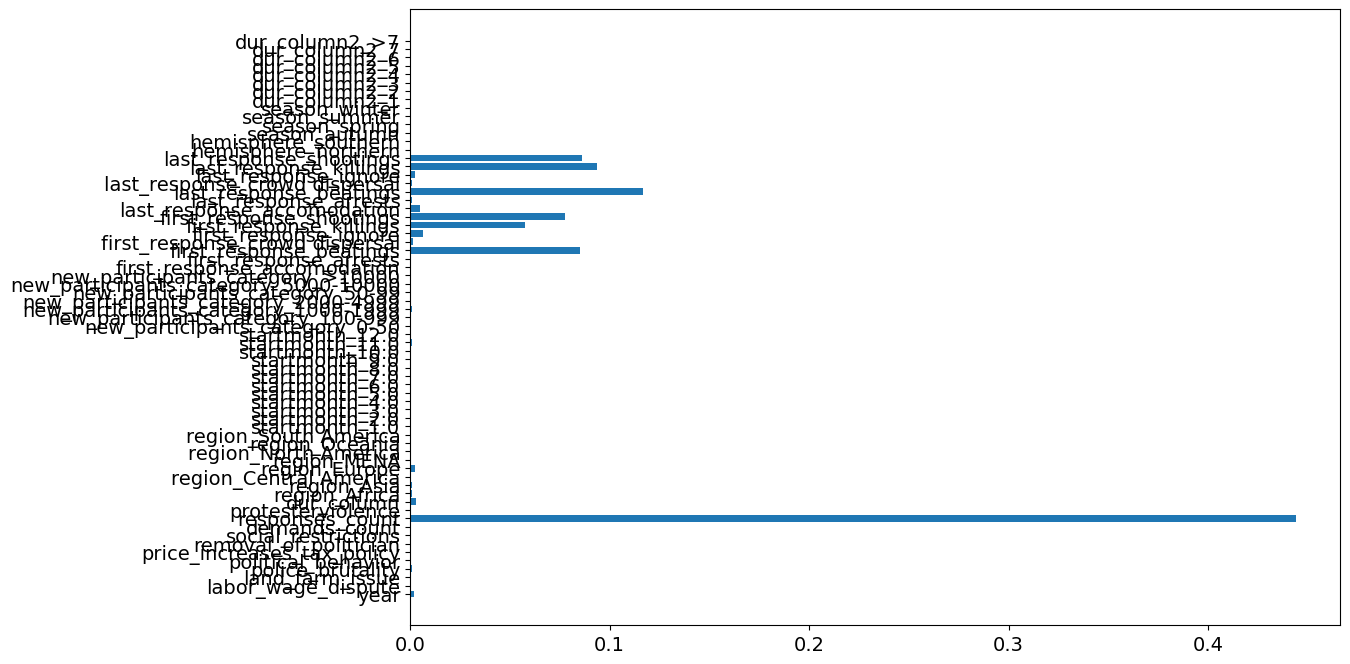

In [238]:
plt.barh(df_encoded.columns, rf.feature_importances_)

In [239]:
df_rf.sort_values(by = 'importance', ascending=False)

feature  importance
9           responses_count    0.444002
48   last_response_beatings    0.116660
51   last_response_killings    0.093740
52  last_response_shootings    0.086053
41  first_response_beatings    0.085319
..                      ...         ...
7       social_restrictions    0.000038
28           startmonth_9.0    0.000036
17     region_North America    0.000022
18           region_Oceania    0.000008
65            dur_column2_7    0.000007

[67 rows x 2 columns]

In [328]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [329]:
X = pd.DataFrame(df_encoded2, columns=df_encoded2.columns)
y = np.ravel(df_target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [330]:
rf2 = RandomForestRegressor(n_estimators=350)
rf2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=350)

In [331]:
rf2.feature_importances_

array([1.24254371e-01, 1.08092776e-02, 5.01633798e-03, 1.01842499e-02,
       1.29742772e-02, 8.21836077e-03, 9.14848137e-03, 3.54760868e-03,
       1.08463836e-02, 4.50197595e-01, 2.18814874e-02, 2.17415231e-02,
       7.77909783e-03, 1.22903930e-02, 3.01250117e-03, 1.98815824e-02,
       1.87712856e-02, 3.58590826e-03, 3.30327854e-04, 7.75129665e-03,
       9.64983620e-03, 9.97183594e-03, 1.07944909e-02, 8.08767304e-03,
       8.11945714e-03, 6.31625268e-03, 7.32451469e-03, 7.52866474e-03,
       5.84976718e-03, 1.01075461e-02, 6.55982725e-03, 6.46942332e-03,
       9.03374513e-03, 1.68688552e-02, 1.16250334e-02, 1.03879528e-02,
       9.91877114e-03, 1.00845449e-02, 7.54824648e-03, 5.67771905e-03,
       5.52708651e-03, 9.30253248e-03, 6.84695732e-03, 7.05794277e-03,
       7.47568524e-03, 6.27819464e-03, 5.51524584e-03, 3.48028700e-03,
       3.20146705e-03, 1.44263636e-03, 7.22343270e-04, 5.61156999e-04,
       2.44196078e-03])

In [332]:
list_of_tuples2 = list(zip(df_encoded2.columns, rf2.feature_importances_)) 

In [333]:
df_rf2 = pd.DataFrame(list_of_tuples2, columns = ['feature', 'importance']) 

In [342]:
df_rf2

feature  importance
0                                   year    0.124254
1                     labor_wage_dispute    0.010809
2                        land_farm_issue    0.005016
3                       police_brutality    0.010184
4                     political_behavior    0.012974
5             price_increases_tax_policy    0.008218
6                  removal_of_politician    0.009148
7                    social_restrictions    0.003548
8                          demands_count    0.010846
9                        responses_count    0.450198
10                     protesterviolence    0.021881
11                            dur_column    0.021742
12                         region_Africa    0.007779
13                           region_Asia    0.012290
14                region_Central America    0.003013
15                         region_Europe    0.019882
16                           region_MENA    0.018771
17                  region_North America    0.003586
18                        region_Oceania    0.000330
19                  region_South America    0.007751
20                        startmonth_1.0    0.009650
21                        startmonth_2.0    0.009972
22                        startmonth_3.0    0.010794
23                        startmonth_4.0    0.008088
24                        startmonth_5.0    0.008119
25                        startmonth_6.0    0.006316
26                        startmonth_7.0    0.007325
27                        startmonth_8.0    0.007529
28                        startmonth_9.0    0.005850
29                       startmonth_10.0    0.010108
30                       startmonth_11.0    0.006560
31                       startmonth_12.0    0.006469
32        new_participants_category_0-50    0.009034
33     new_participants_category_100-999    0.016869
34   new_participants_category_1000-1999    0.011625
35   new_participants_category_2000-4999    0.010388
36       new_participants_category_50-99    0.009919
37  new_participants_category_5000-10000    0.010085
38      new_participants_category_>10000    0.007548
39                   hemisphere_northern    0.005678
40                   hemisphere_southern    0.005527
41                         season_autumn    0.009303
42                         season_spring    0.006847
43                         season_summer    0.007058
44                         season_winter    0.007476
45                         dur_column2_1    0.006278
46                         dur_column2_2    0.005515
47                         dur_column2_3    0.003480
48                         dur_column2_4    0.003201
49                         dur_column2_5    0.001443
50                         dur_column2_6    0.000722
51                         dur_column2_7    0.000561
52                        dur_column2_>7    0.002442

In [396]:
sorted_feat20 = df_rf2.nlargest(20,'importance')

In [403]:
sorted_feat20.head()

feature  importance
9     responses_count    0.450198
0                year    0.124254
10  protesterviolence    0.021881
11         dur_column    0.021742
15      region_Europe    0.019882

In [389]:
sorted_feat20

feature  importance
9                        responses_count    0.450198
0                                   year    0.124254
10                     protesterviolence    0.021881
11                            dur_column    0.021742
15                         region_Europe    0.019882
16                           region_MENA    0.018771
33     new_participants_category_100-999    0.016869
4                     political_behavior    0.012974
13                           region_Asia    0.012290
34   new_participants_category_1000-1999    0.011625
8                          demands_count    0.010846
1                     labor_wage_dispute    0.010809
22                        startmonth_3.0    0.010794
35   new_participants_category_2000-4999    0.010388
3                       police_brutality    0.010184
29                       startmonth_10.0    0.010108
37  new_participants_category_5000-10000    0.010085
21                        startmonth_2.0    0.009972
36       new_participants_category_50-99    0.009919
20                        startmonth_1.0    0.009650

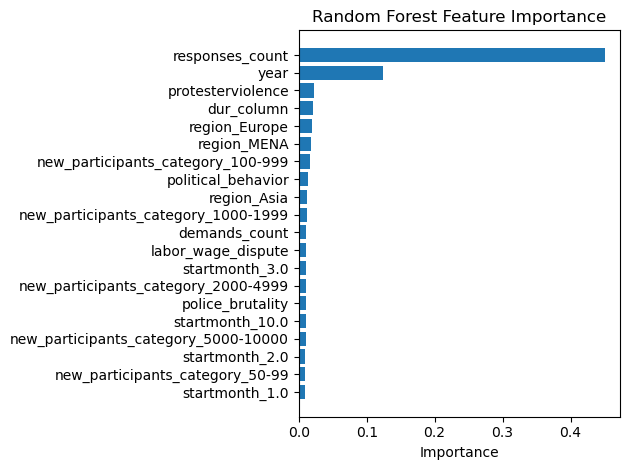

In [406]:
plt.barh('feature','importance',data=sorted_feat20)
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig('15_Feature_Importance.png')

Text(0.5, 0, 'Random Forest Feature Importance')

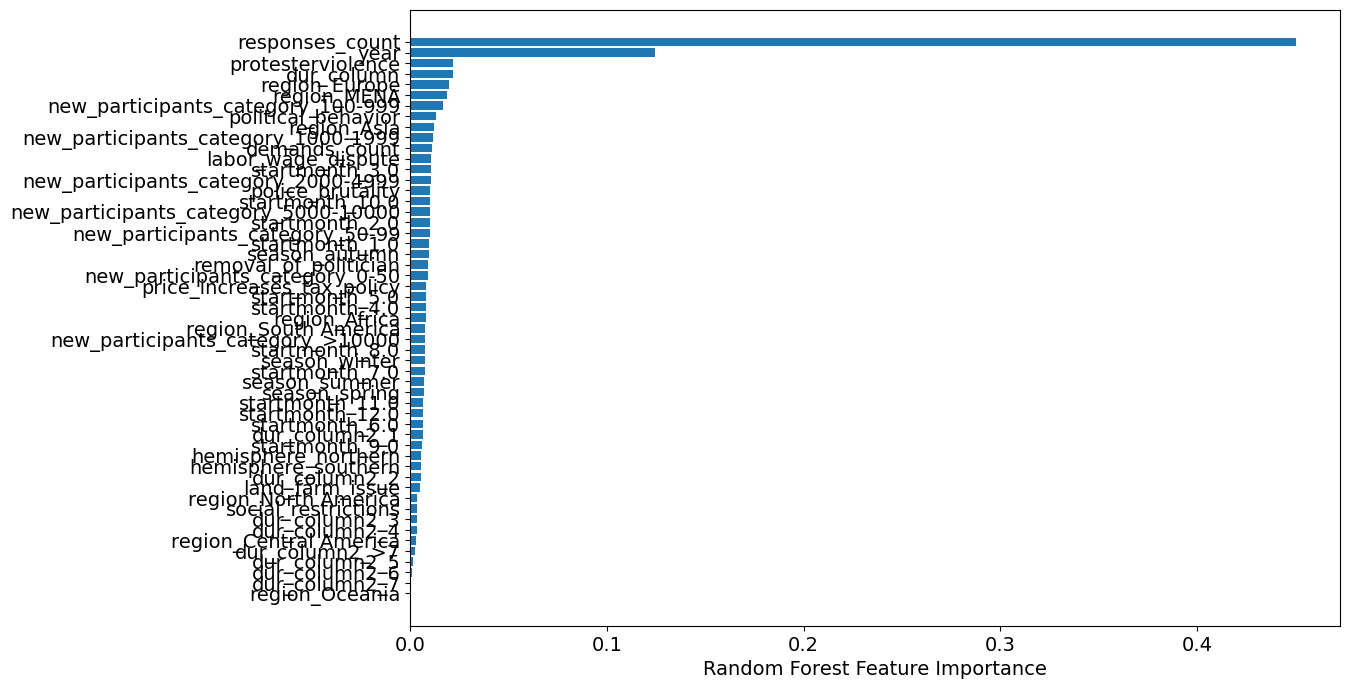

In [346]:
sorted_feat = rf2.feature_importances_.argsort()
plt.barh(df_encoded2.columns[sorted_feat], rf2.feature_importances_[sorted_feat])
plt.xlabel("Random Forest Feature Importance")

Feature Importance on data set used for final models

In [1]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

NameError: name 'plt' is not defined

In [ ]:
X = pd.DataFrame(df_encoded3, columns=df_encoded3.columns)
y = np.ravel(df_target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [ ]:
rf3 = RandomForestRegressor(n_estimators=100)
rf3.fit(X_train, y_train)

In [ ]:
rf3.feature_importances_

In [ ]:
list_of_tuples3 = list(zip(df_encoded3.columns, rf3.feature_importances_)) 

In [ ]:
df_rf3 = pd.DataFrame(list_of_tuples3, columns = ['feature', 'importance']) 

In [ ]:
sorted_feat20a = df_rf3.nlargest(20,'importance')

In [ ]:
plt.barh('feature','importance',data=sorted_feat20a)
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig('15a_Feature_Importance.png')

## Cramers_V

In [174]:
#df_cross = pd.merge(df_encoded2, df_target, left_index=True, right_index=True)

In [175]:
#df_cross.head()

year  labor_wage_dispute  land_farm_issue  police_brutality  \
0  1990                True            False             False   
1  1990               False            False             False   
2  1990               False            False             False   
3  1990               False             True             False   
4  1990               False            False             False   

   political_behavior  price_increases_tax_policy  removal_of_politician  \
0                True                       False                  False   
1                True                       False                  False   
2                True                       False                  False   
3               False                       False                  False   
4                True                       False                  False   

   social_restrictions  demands_count  responses_count  ...  season_winter  \
0                False              2                1  ...              1   
1                False              1                1  ...              0   
2                False              1                1  ...              0   
3                False              1                1  ...              0   
4                False              1                3  ...              0   

   dur_column2_1  dur_column2_2  dur_column2_3  dur_column2_4  dur_column2_5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              0              0              0              0              0   
4              0              1              0              0              0   

   dur_column2_6  dur_column2_7  dur_column2_>7  Violent_Response  
0              0              0               0             False  
1              0              0               0             False  
2              0              0               0             False  
3              0              0               1             False  
4              0              0               0             False  

[5 rows x 54 columns]

In [176]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



In [177]:
rows= []

for x in df_encoded2:
  col = []
  for y in df_encoded2:
    cramers =cramers_v(df_encoded2[x], df_encoded2[y]) # Cramer's V test defined above
    col.append(round(cramers,2)) # Appending the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df4 = pd.DataFrame(cramers_results, columns =df_encoded2.columns, index =df_encoded2.columns)



df4

year  labor_wage_dispute  \
year                                  1.00                0.09   
labor_wage_dispute                    0.09                1.00   
land_farm_issue                       0.12                0.07   
police_brutality                      0.08                0.10   
political_behavior                    0.11                0.35   
price_increases_tax_policy            0.12                0.01   
removal_of_politician                 0.20                0.10   
social_restrictions                   0.10                0.07   
demands_count                         0.15                0.26   
responses_count                       0.04                0.05   
protesterviolence                     0.09                0.03   
dur_column                            0.01                0.10   
region_Africa                         0.13                0.02   
region_Asia                           0.14                0.08   
region_Central America                0.08                0.00   
region_Europe                         0.14                0.08   
region_MENA                           0.23                0.06   
region_North America                  0.11                0.04   
region_Oceania                        0.04                0.00   
region_South America                  0.14                0.03   
startmonth_1.0                        0.14                0.02   
startmonth_2.0                        0.10                0.00   
startmonth_3.0                        0.08                0.01   
startmonth_4.0                        0.06                0.00   
startmonth_5.0                        0.07                0.03   
startmonth_6.0                        0.06                0.01   
startmonth_7.0                        0.06                0.00   
startmonth_8.0                        0.06                0.02   
startmonth_9.0                        0.05                0.00   
startmonth_10.0                       0.05                0.00   
startmonth_11.0                       0.06                0.01   
startmonth_12.0                       0.05                0.00   
new_participants_category_0-50        0.10                0.00   
new_participants_category_100-999     0.09                0.01   
new_participants_category_1000-1999   0.15                0.03   
new_participants_category_2000-4999   0.07                0.01   
new_participants_category_50-99       0.24                0.02   
new_participants_category_5000-10000  0.11                0.01   
new_participants_category_>10000      0.12                0.06   
hemisphere_northern                   0.11                0.01   
hemisphere_southern                   0.11                0.01   
season_autumn                         0.09                0.01   
season_spring                         0.07                0.03   
season_summer                         0.07                0.03   
season_winter                         0.12                0.01   
dur_column2_1                         0.10                0.05   
dur_column2_2                         0.07                0.00   
dur_column2_3                         0.04                0.00   
dur_column2_4                         0.00                0.01   
dur_column2_5                         0.02                0.02   
dur_column2_6                         0.04                0.00   
dur_column2_7                         0.02                0.00   
dur_column2_>7                        0.08                0.05   

                                      land_farm_issue  police_brutality  \
year                                             0.12              0.08   
labor_wage_dispute                               0.07              0.10   
land_farm_issue                                  1.00              0.03   
police_brutality                                 0.03              1.00   
political_behavior                               0.17              0.23   
price_increases_tax_pol

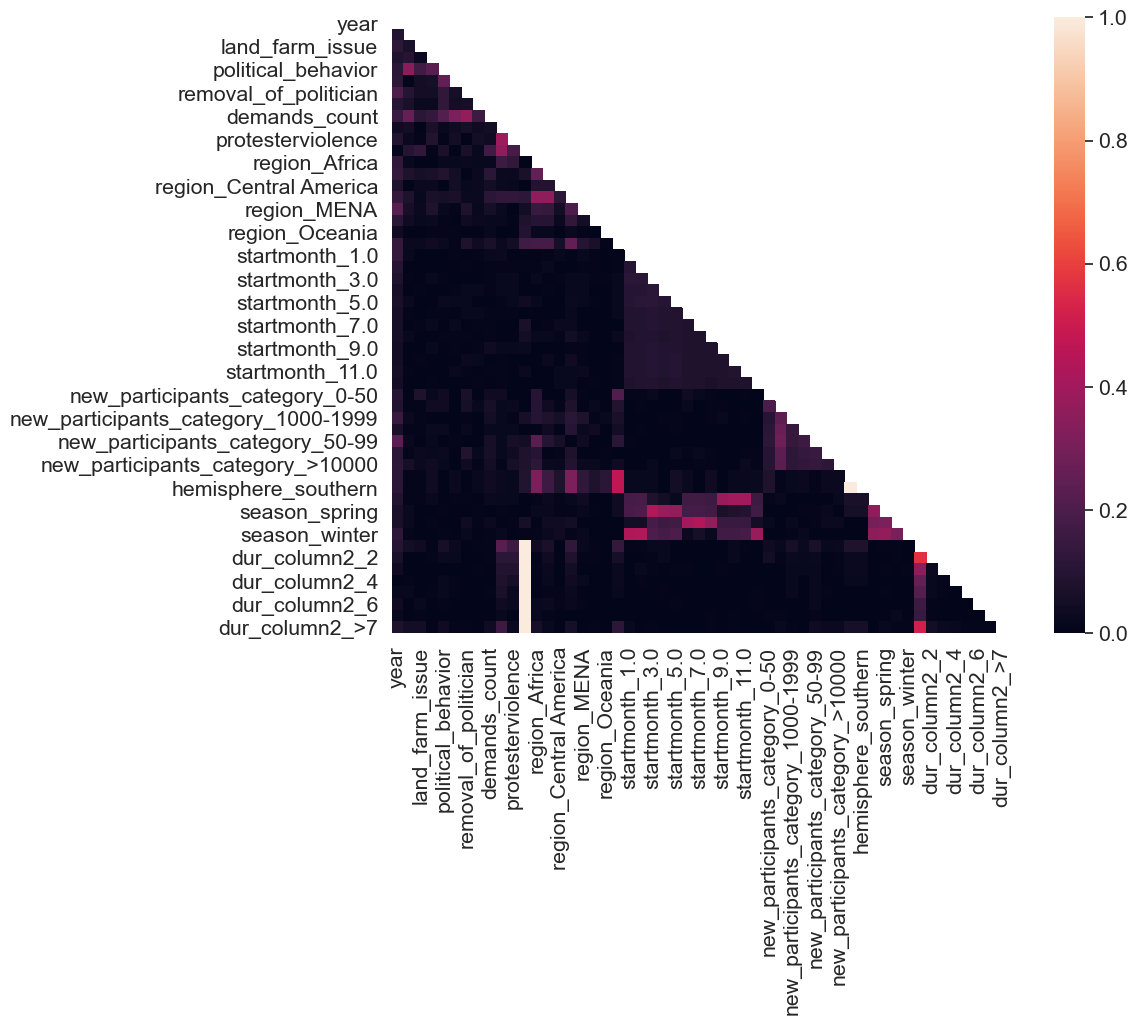

In [178]:
mask = np.zeros_like(df4, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df4, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

## Logistic Regression

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

#Setting up x and y
X = df_encoded3
features_list = df_encoded3.columns
y = np.ravel(df_target)

In [358]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [359]:
# Setting up hyperparameter grid
c_space = [0.0001, 0.001, .01, .1, .5, 1, 10]
param_grid = {'C': c_space}

In [360]:
# Creating default model : logistic regression
logreg = LogisticRegression()

In [361]:
#Creating grid Search with log reg and cv=5
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

In [362]:
# Fitting to training data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Best Model Parameters: {}".format(logreg_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(logreg_cv.best_score_))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

Best Model Parameters: {'C': 0.0001}
Best AUC-ROC score is 0.7131060426314011


## Random Forest

In [363]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Setting up x and y
X = df_encoded2
features_list = df_encoded2.columns
y = np.ravel(df_target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Setting up hyperparameter grid
n_estimators = np.arange(50, 400, 50)#number of trees in Forest
max_depth = np.arange(1,8)#depth of trees
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}

# Creating default model : random forest 
rf = RandomForestClassifier()
# Creating grid Search with log reg and cv=5
rf_cv = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')

# Fitting the model
rf_cv.fit(X_train, y_train)

print("Best Random Forest Parameters: {}".format(rf_cv.best_params_)) 
print("Best score is {}".format(rf_cv.best_score_))

Best Random Forest Parameters: {'max_depth': 7, 'n_estimators': 200}
Best score is 0.9428446621507147


In [364]:
df_encoded3.head()

year  labor_wage_dispute  land_farm_issue  police_brutality  \
0  1990                True            False             False   
1  1990               False            False             False   
2  1990               False            False             False   
3  1990               False             True             False   
4  1990               False            False             False   

   political_behavior  price_increases_tax_policy  removal_of_politician  \
0                True                       False                  False   
1                True                       False                  False   
2                True                       False                  False   
3               False                       False                  False   
4                True                       False                  False   

   social_restrictions  demands_count  region_Africa  ...  \
0                False              2              0  ...   
1                False              1              0  ...   
2                False              1              0  ...   
3                False              1              0  ...   
4                False              1              0  ...   

   new_participants_category_2000-4999  new_participants_category_50-99  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   new_participants_category_5000-10000  new_participants_category_>10000  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   hemisphere_northern  hemisphere_southern  season_autumn  season_spring  \
0                    1                    0              0              0   
1                    1                    0              0              0   
2                    1                    0              0              0   
3                    1                    0              0              0   
4                    1                    0              0              0   

   season_summer  season_winter  
0              0              1  
1              1              0  
2              1              0  
3              1              0  
4              1              0  

[5 rows x 42 columns]

In [365]:
#Model based on real life data

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Setting up x and y
X = df_encoded3
features_list = df_encoded3.columns
y = np.ravel(df_target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Setting up hyperparameter grid
n_estimators = np.arange(50, 400, 50)#number of trees in Forest
max_depth = np.arange(1,8)#depth of trees
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}

# Creating default model : random forest 
rf = RandomForestClassifier()
# Creating grid Search with log reg and cv=5
rf_cv = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')

# Fitting the model
rf_cv.fit(X_train, y_train)

print("Best Random Forest Parameters: {}".format(rf_cv.best_params_)) 
print("Best score is {}".format(rf_cv.best_score_))

Best Random Forest Parameters: {'max_depth': 7, 'n_estimators': 350}
Best score is 0.7415184844839441


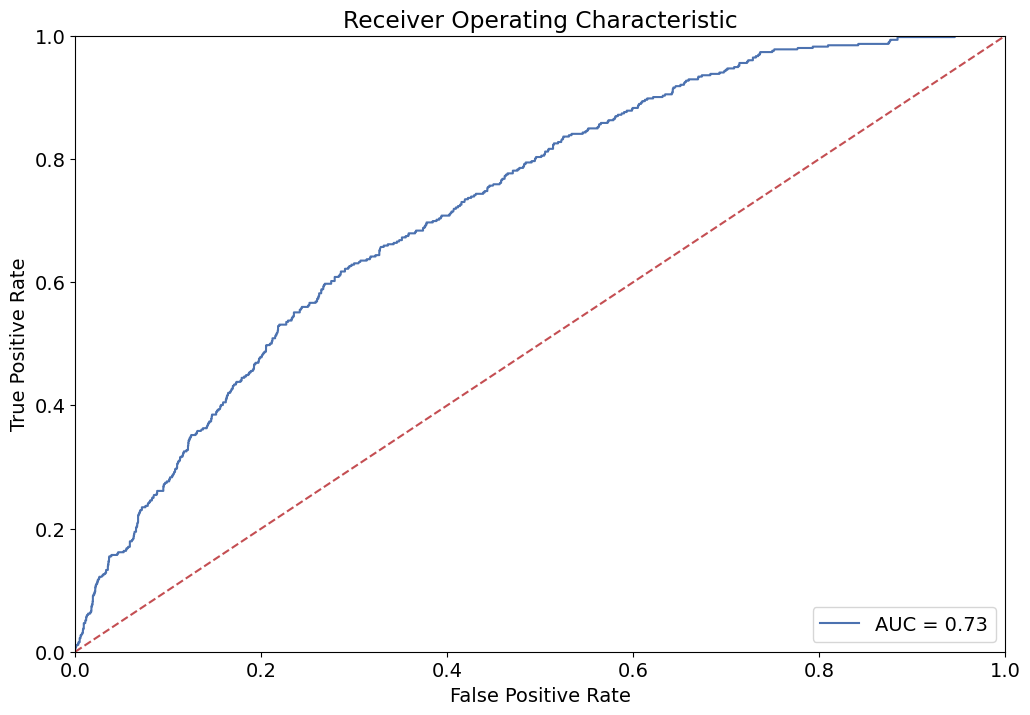

In [366]:
import sklearn.metrics as metrics
# calculate the false positive rate and true positive rate for all thresholds of the classification
probs = rf_cv.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plotting with matplotlib

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

In [367]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

X = df_encoded3
y = np.ravel(df_target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

n_estimators = np.arange(100,600,100)
max_depth = [1,2,4,8]
learning_rate = [.05,.1,.2,.5,1]

param_dist = {'n_estimators': n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate}

gbm = GradientBoostingClassifier()

#RandomSearchCV object: 
gbm_cv = RandomizedSearchCV(gbm, param_distributions = param_dist, cv=5, scoring='roc_auc', n_iter=30)

#Fitting the model
gbm_cv.fit(X_train, y_train)

print("Best Gradient Boosting Parameters: {}".format(gbm_cv.best_params_)) 
print("Best score is {}".format(gbm_cv.best_score_))

Best Gradient Boosting Parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05}
Best score is 0.7419303410153688


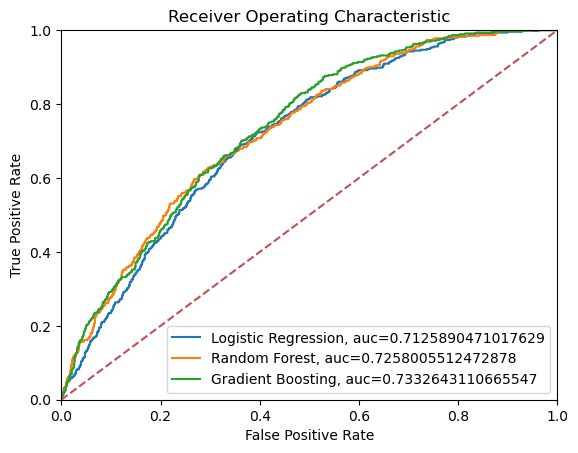

In [370]:
from sklearn import metrics

plt.figure(0).clf()
# calculate the false positive rate and true positive rate for all thresholds of the classification
#Log reg
probs = logreg_cv.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(roc_auc))

#randomforest
probs = rf_cv.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(roc_auc))
#GradientBoost
probs = gbm_cv.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="Gradient Boosting, auc="+str(roc_auc))



# plotting with matplotlib
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('AUC.png')
plt.show()